In [362]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
from scipy.stats import pearsonr
from tensorflow.keras.models import load_model
import joblib

# En este documento se predecirán nuevas gráficas con valores de fracción volumen, radio y espesor de la partícula nuevos

Carga del modelo normalizado

In [363]:
model = tf.keras.models.load_model('EXPERIMENT.h5')

# Especificando los valores a usar

In [364]:
fracvol =  2
radio = 20
espesor = 200
longitud_de_onda = list(range(301, 901))

Creando diccionario

In [365]:
data = {
    "Longitud de onda": longitud_de_onda,
    "Fracvol": [fracvol] * len(longitud_de_onda),
    "Radio (nm)": [radio] * len(longitud_de_onda),
    "Espesor de la película (nm)": [espesor] * len(longitud_de_onda)
}

Creando DF

In [366]:
df  = pd.DataFrame(data)
df

Longitud de onda  Fracvol  Radio (nm)  Espesor de la película (nm)
0                 301        2          20                          200
1                 302        2          20                          200
2                 303        2          20                          200
3                 304        2          20                          200
4                 305        2          20                          200
..                ...      ...         ...                          ...
595               896        2          20                          200
596               897        2          20                          200
597               898        2          20                          200
598               899        2          20                          200
599               900        2          20                          200

[600 rows x 4 columns]

Normalizando valores

In [367]:
scaler_X = joblib.load('minmax_scaler_X.pkl')
x = df.values
x_norm = scaler_X.transform(x)

# Predicciones

In [368]:
predictions = model.predict(x_norm)

19/19 [==============================] - 0s 583us/step


In [369]:
df1 = pd.DataFrame(df, columns = ['Longitud de onda', 'Fracvol', 'Radio (nm)', 'Espesor de la película (nm)'])
df2 = pd.DataFrame(predictions , columns = ['Índice de absorción'])

In [370]:
result_df = pd.concat([df1, df2], axis=1)
result_df

Longitud de onda  Fracvol  Radio (nm)  Espesor de la película (nm)  \
0                 301        2          20                          200   
1                 302        2          20                          200   
2                 303        2          20                          200   
3                 304        2          20                          200   
4                 305        2          20                          200   
..                ...      ...         ...                          ...   
595               896        2          20                          200   
596               897        2          20                          200   
597               898        2          20                          200   
598               899        2          20                          200   
599               900        2          20                          200   

     Índice de absorción  
0               0.015645  
1               0.015366  
2               0.015086  
3               0.014807  
4               0.014527  
..                   ...  
595             0.001234  
596             0.001242  
597             0.001249  
598             0.001256  
599             0.001263  

[600 rows x 5 columns]

# Gráfica con valores normalizados

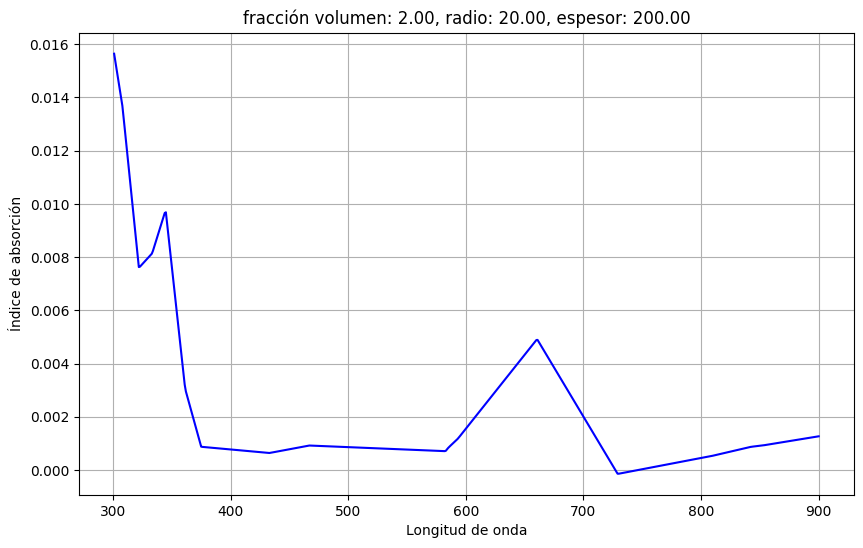

In [371]:
columnas_seleccionadas = ['Longitud de onda', 'Índice de absorción']
df_seleccionado = result_df[columnas_seleccionadas]
titulo = 'fracción volumen: {:.2f}, radio: {:.2f}, espesor: {:.2f}'.format(fracvol, radio, espesor)

# Crear la gráfica de dispersión
plt.figure(figsize=(10, 6))
plt.plot(df_seleccionado['Longitud de onda'], df_seleccionado['Índice de absorción'], color='blue')
plt.xlabel('Longitud de onda')
plt.ylabel('Índice de absorción')
plt.title(titulo)
plt.grid(True)
plt.show()

# Haciendolo con varias gráficas a la vez

In [372]:
fracvol =  list(range(1,16,2))
radio = list(range(15,50,3))
espesor = list(range(60,140,5))
longitud_de_onda = list(range(301, 901))

 1/19 [>.............................] - ETA: 0s

19/19 [==============================] - 0s 564us/step


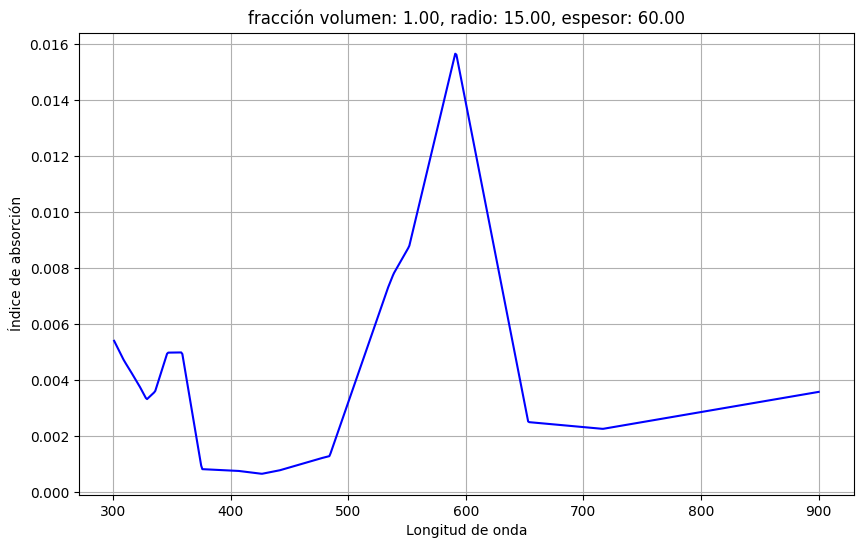

19/19 [==============================] - 0s 613us/step


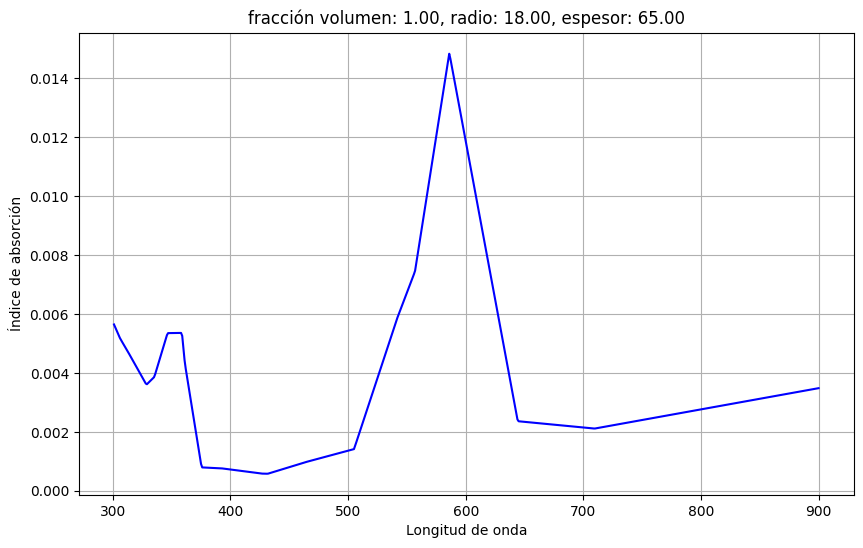

19/19 [==============================] - 0s 606us/step


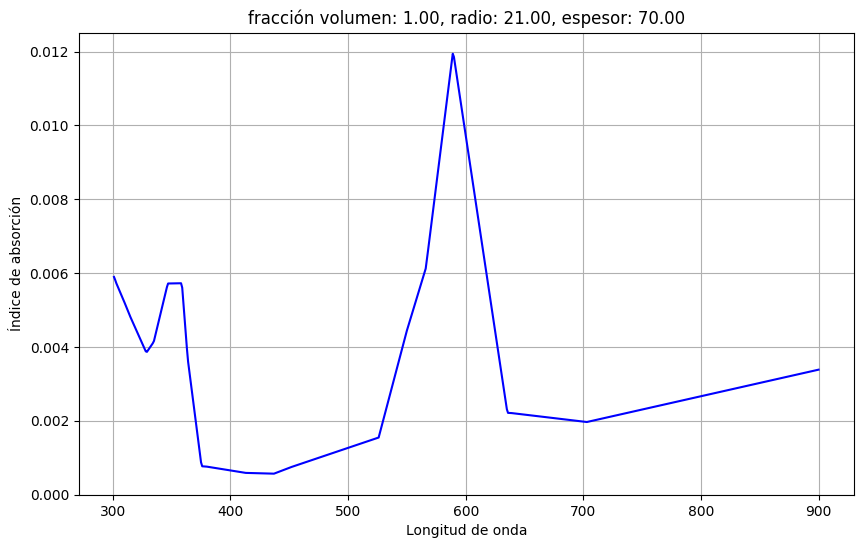

19/19 [==============================] - 0s 572us/step


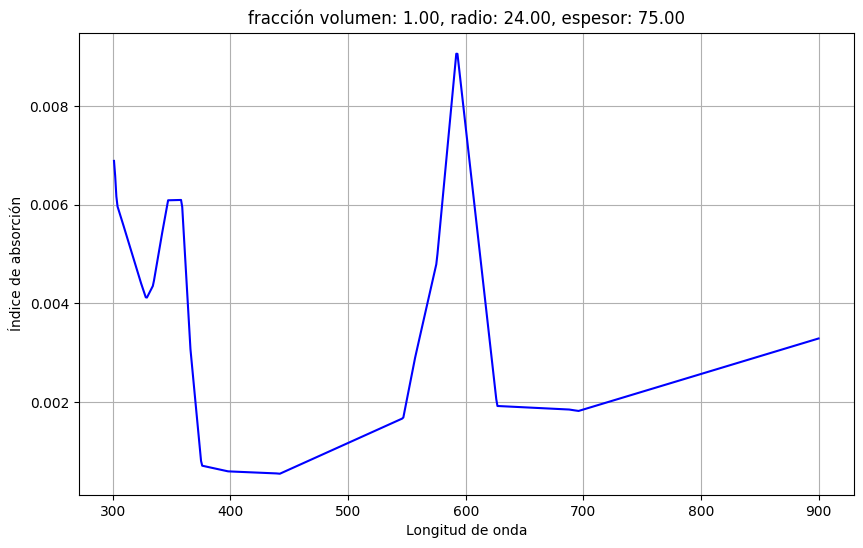

19/19 [==============================] - 0s 535us/step


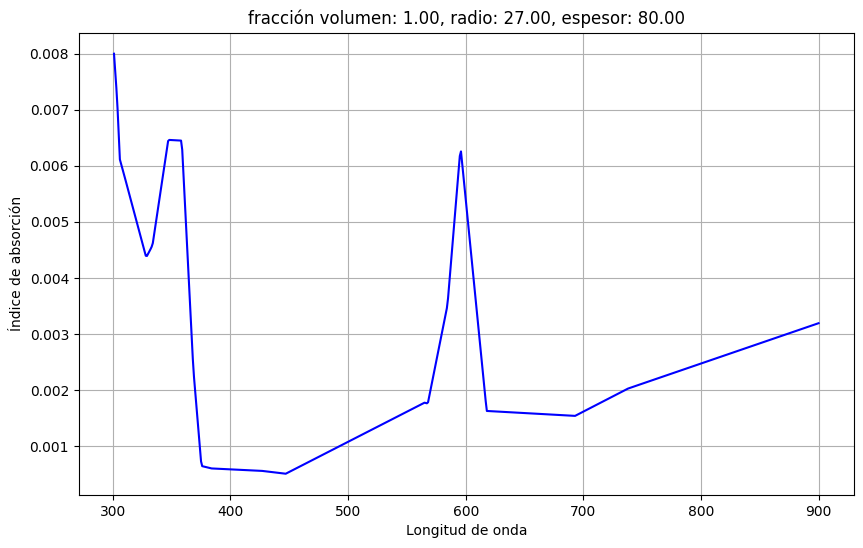

19/19 [==============================] - 0s 568us/step


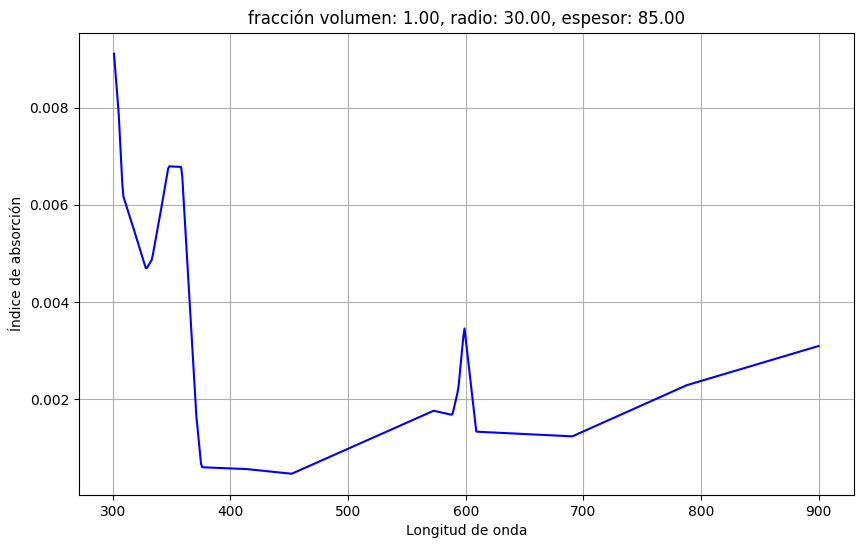

19/19 [==============================] - 0s 527us/step


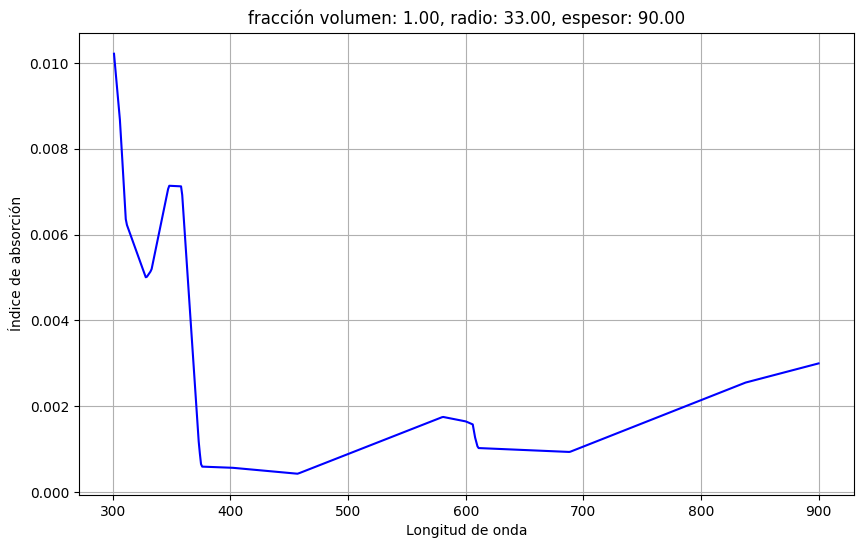

19/19 [==============================] - 0s 568us/step


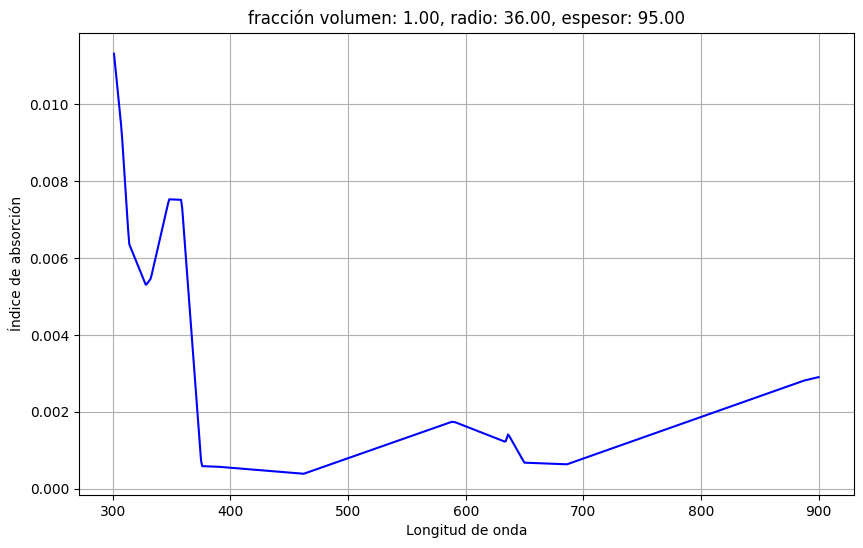

19/19 [==============================] - 0s 611us/step


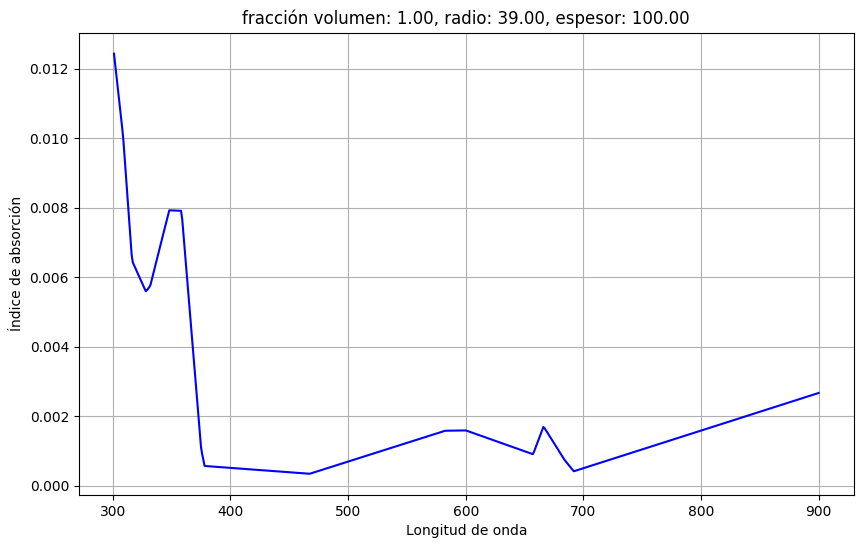

19/19 [==============================] - 0s 618us/step


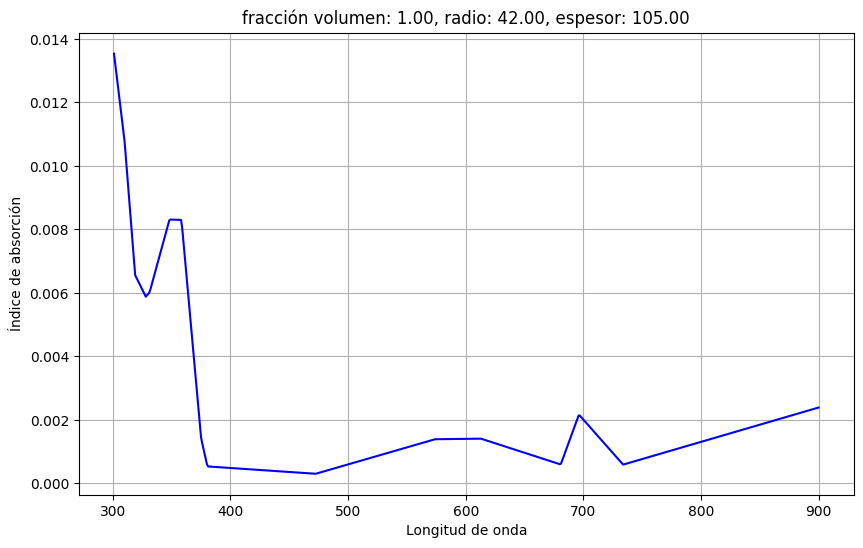

19/19 [==============================] - 0s 552us/step


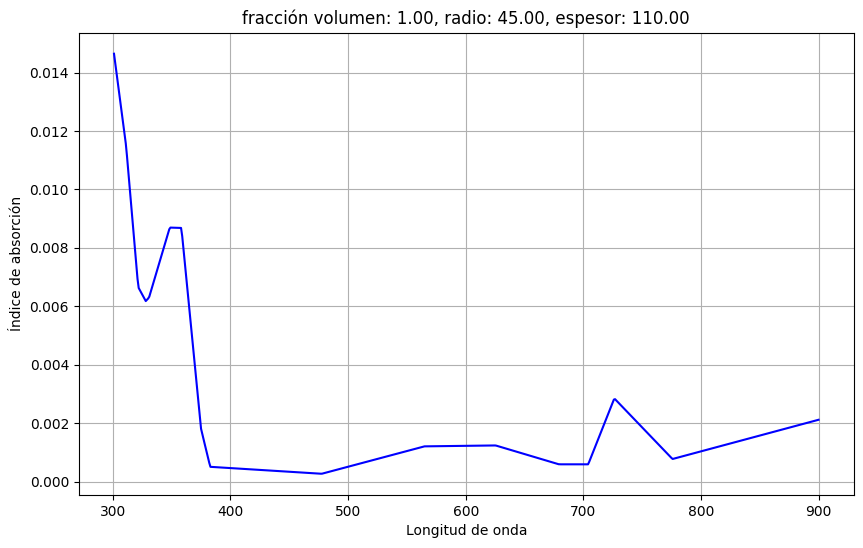

19/19 [==============================] - 0s 598us/step


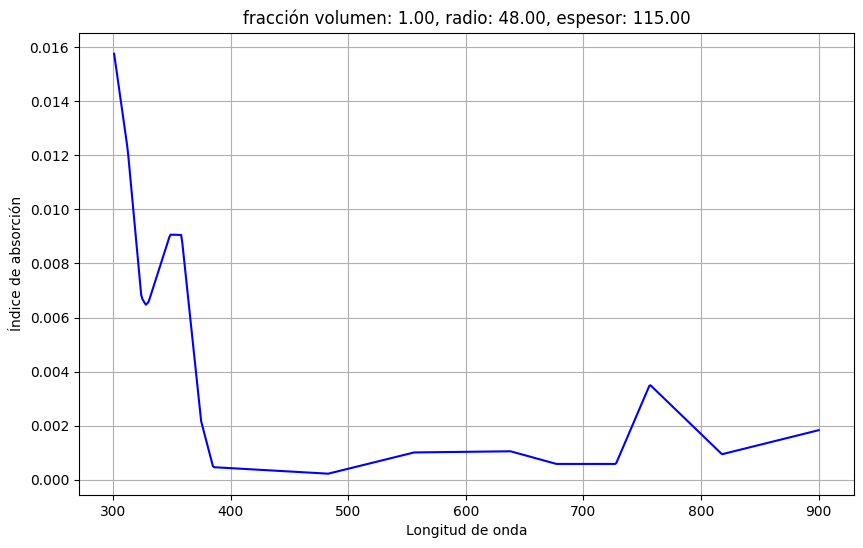

19/19 [==============================] - 0s 582us/step


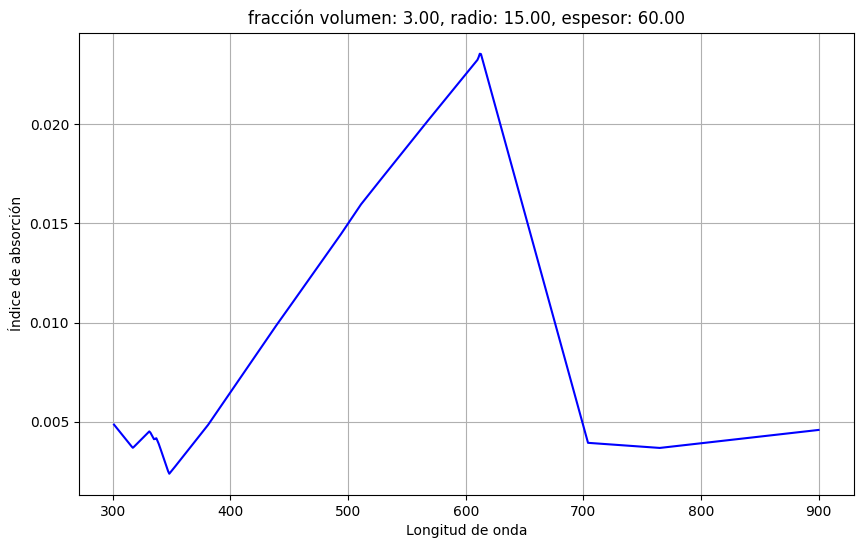

19/19 [==============================] - 0s 618us/step


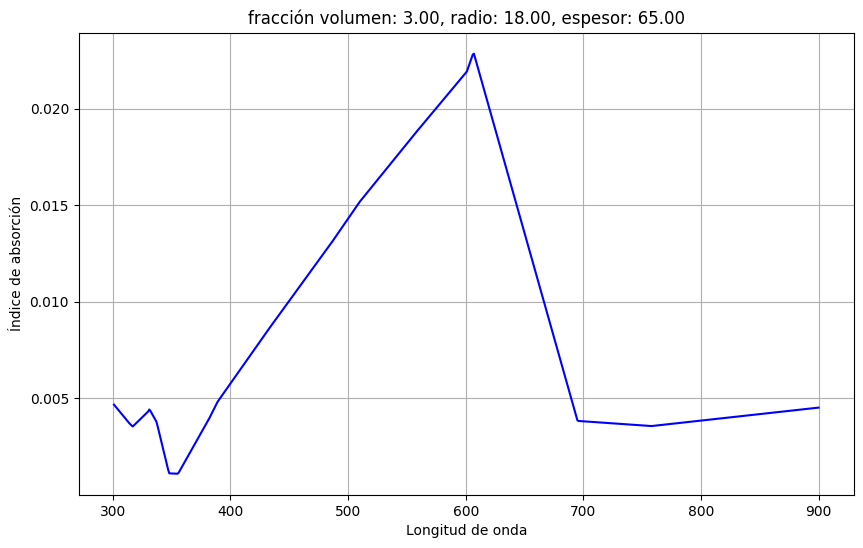

19/19 [==============================] - 0s 536us/step


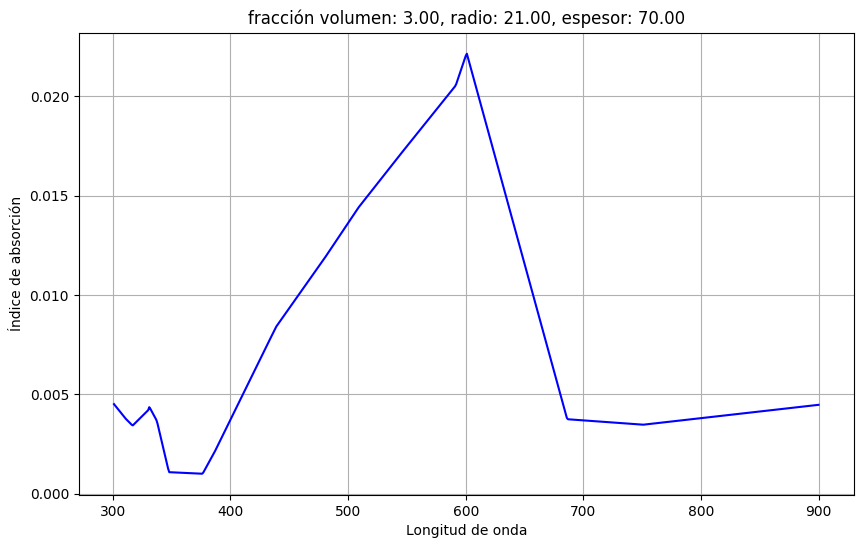

19/19 [==============================] - 0s 556us/step


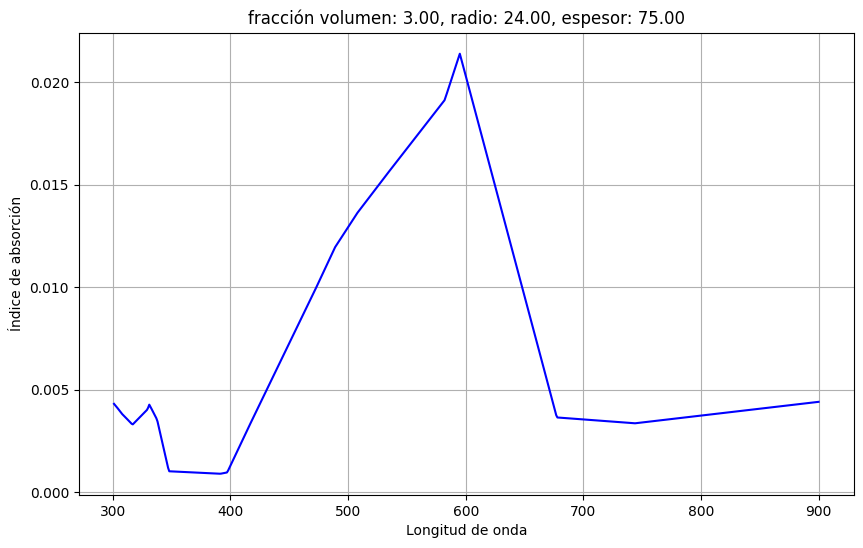

19/19 [==============================] - 0s 507us/step


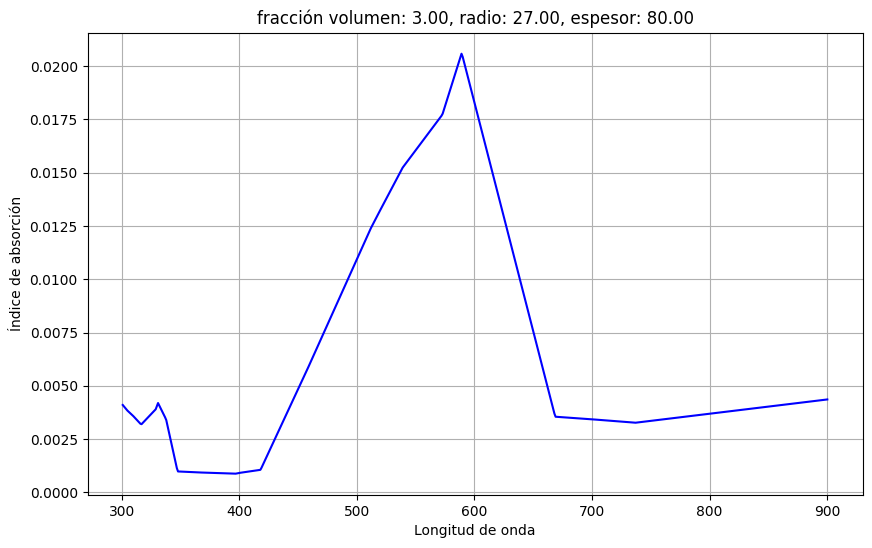

19/19 [==============================] - 0s 611us/step


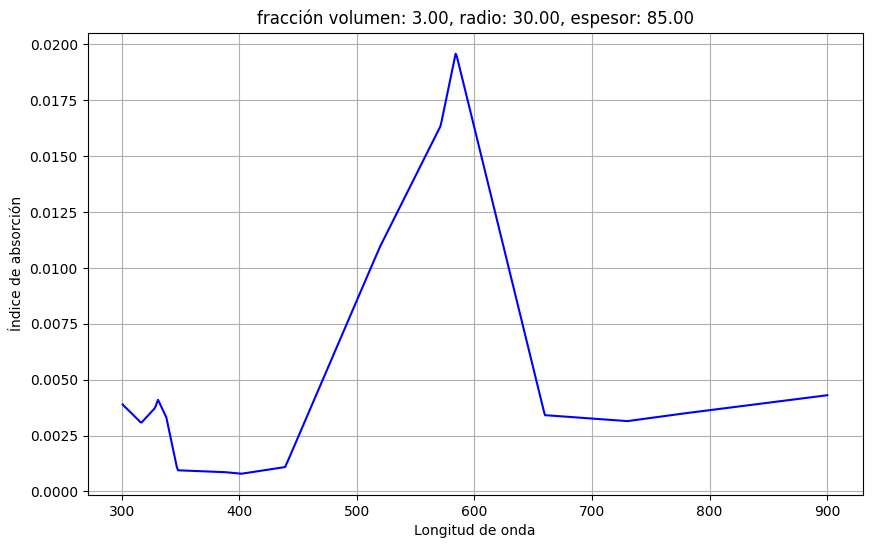

19/19 [==============================] - 0s 538us/step


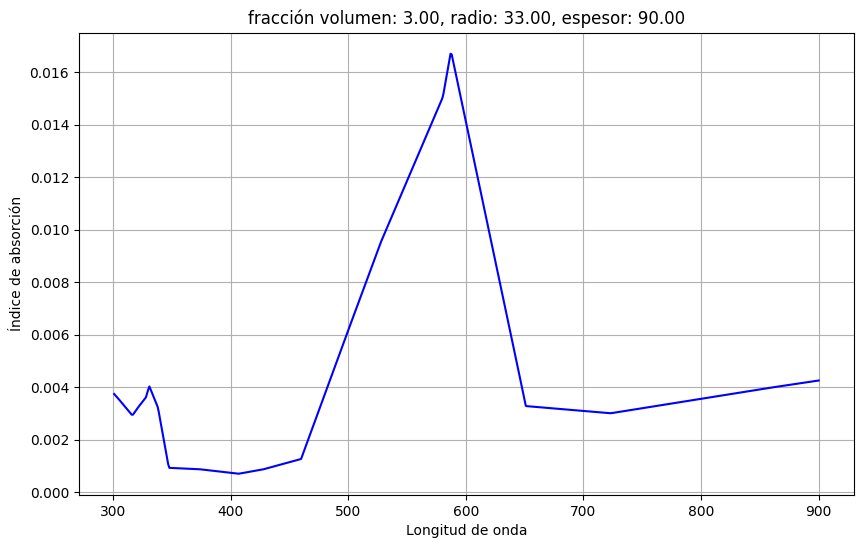

19/19 [==============================] - 0s 565us/step


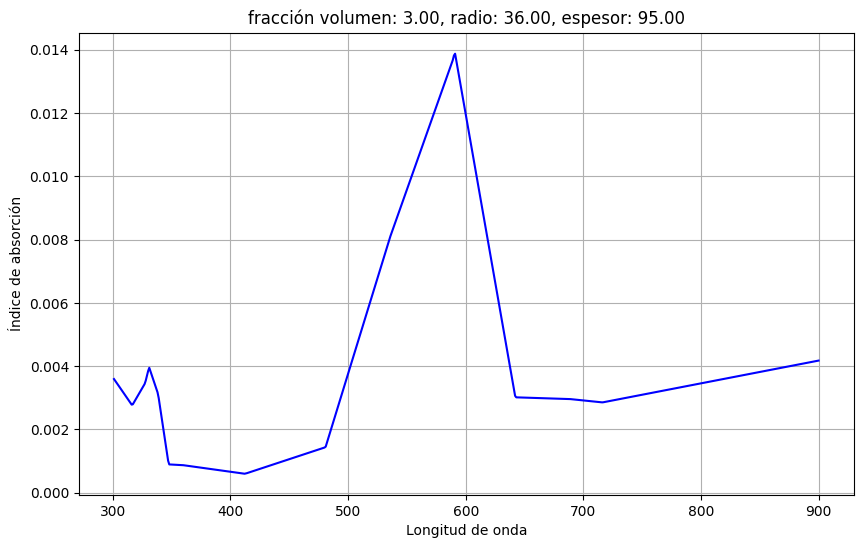

19/19 [==============================] - 0s 560us/step


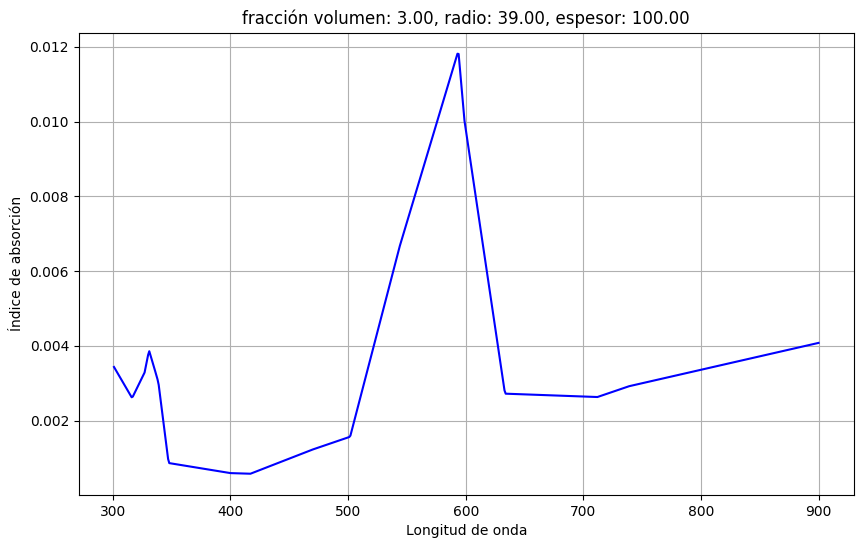

19/19 [==============================] - 0s 627us/step


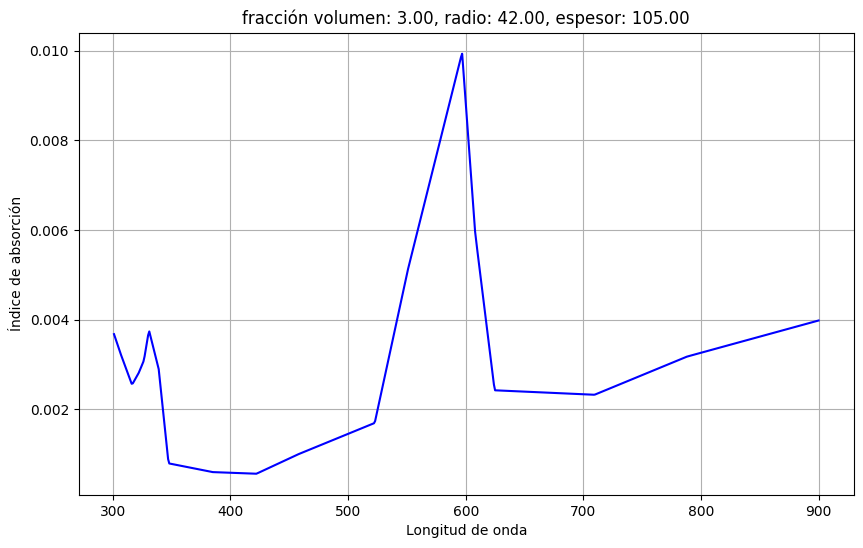

19/19 [==============================] - 0s 548us/step


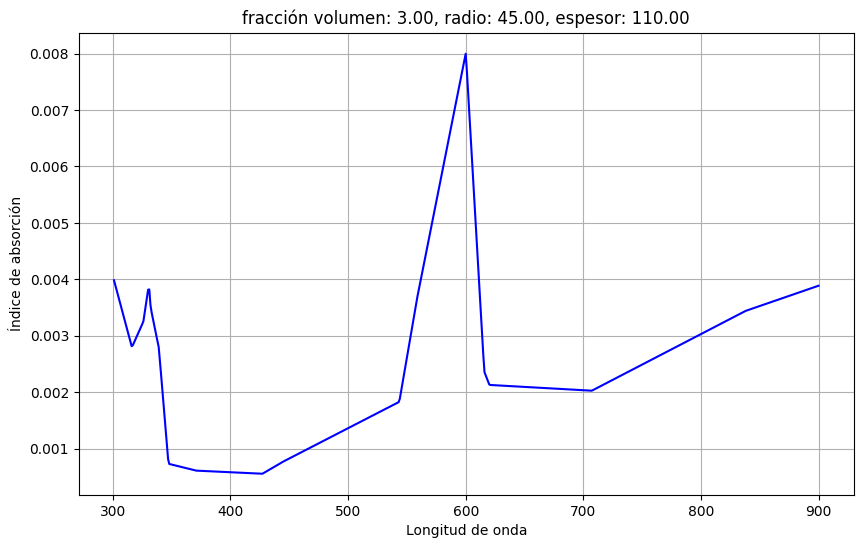

19/19 [==============================] - 0s 636us/step


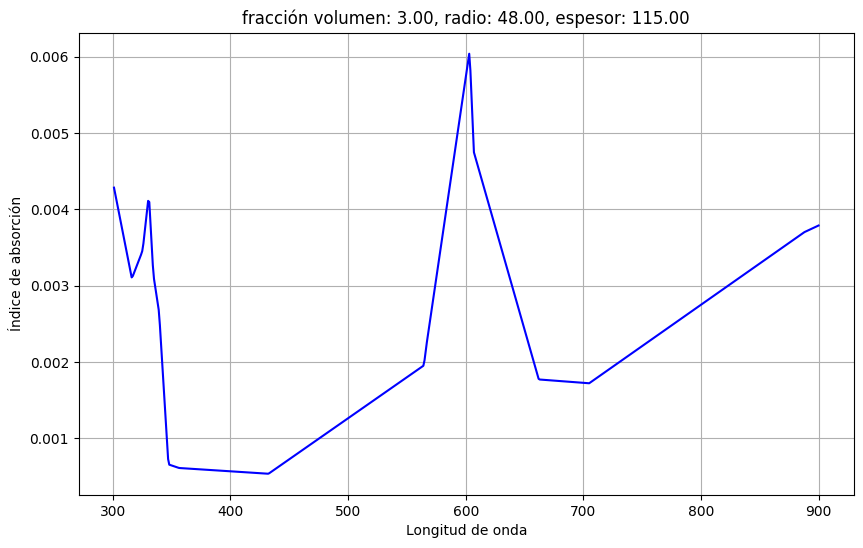

19/19 [==============================] - 0s 514us/step


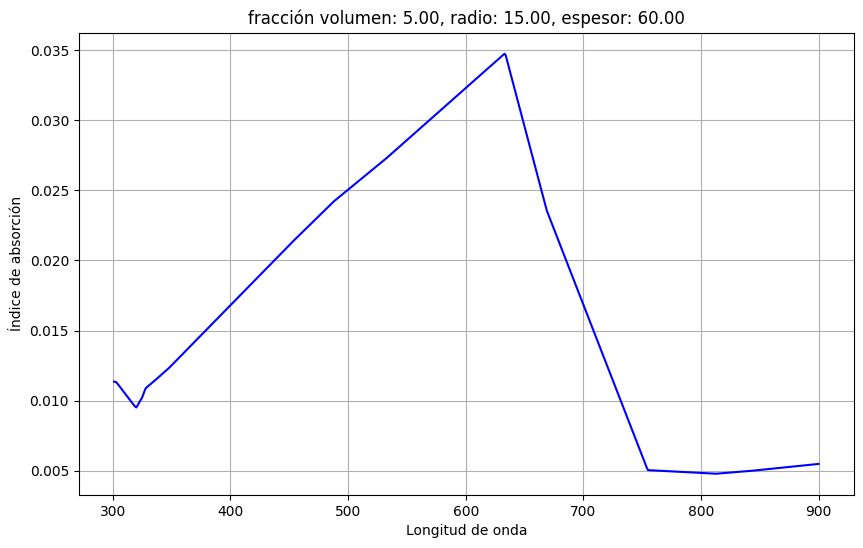

19/19 [==============================] - 0s 545us/step


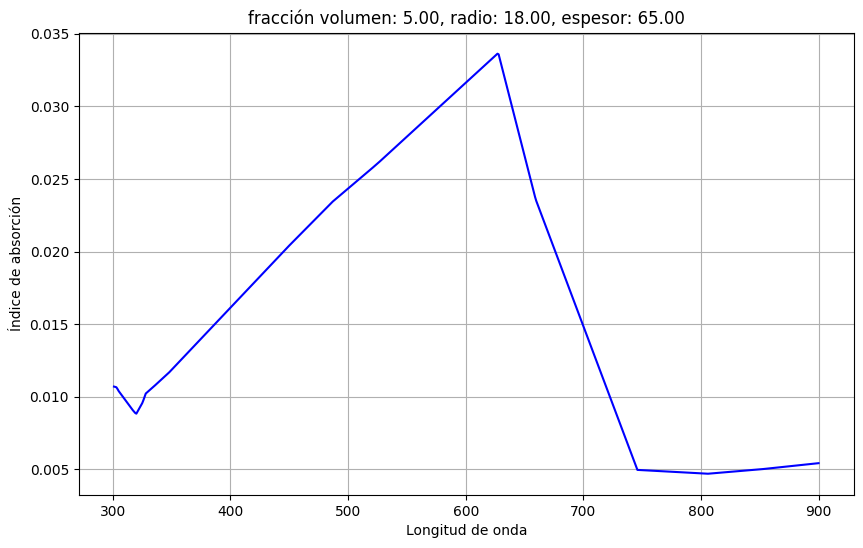

19/19 [==============================] - 0s 534us/step


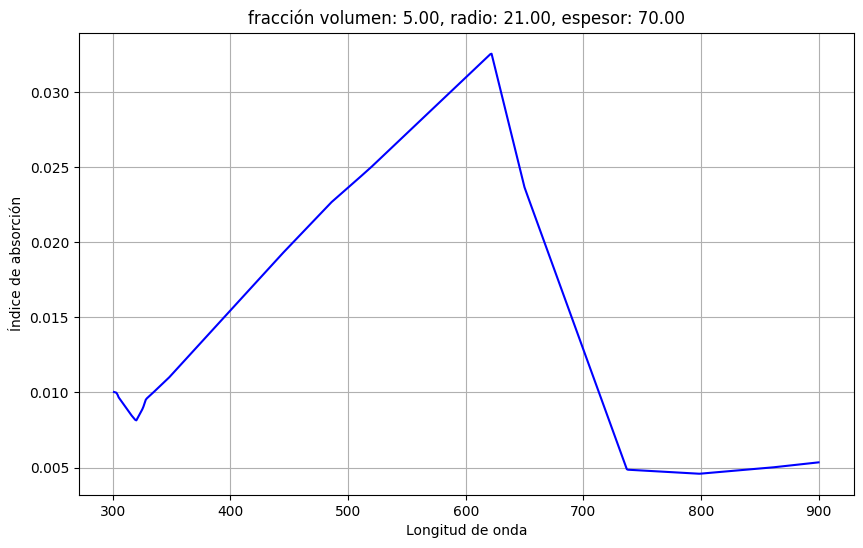

19/19 [==============================] - 0s 567us/step


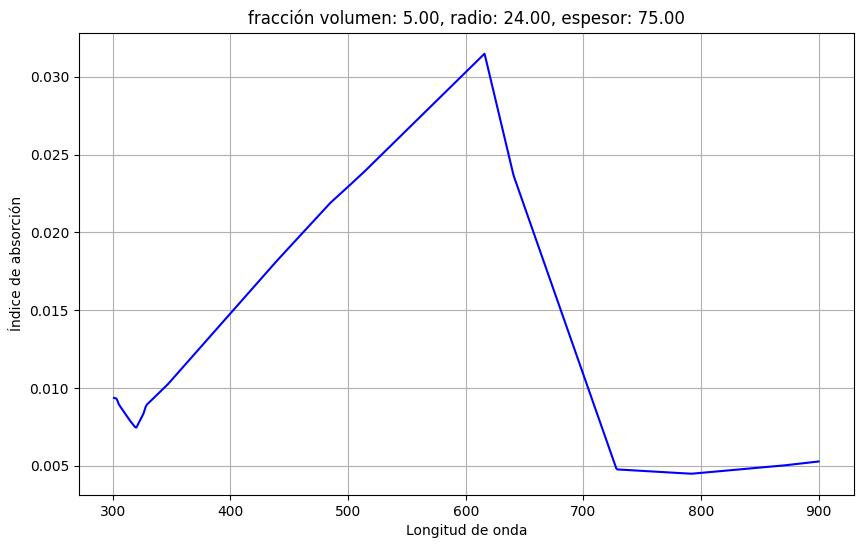

19/19 [==============================] - 0s 531us/step


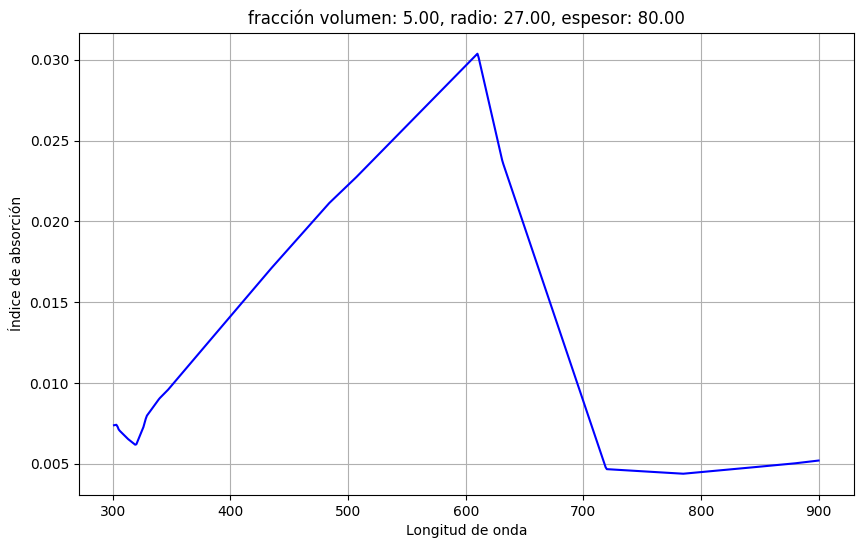

19/19 [==============================] - 0s 572us/step


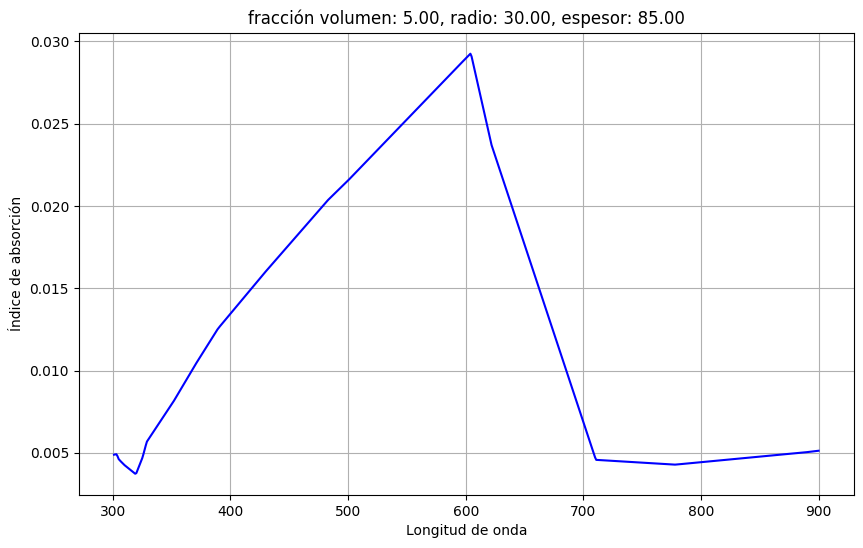

19/19 [==============================] - 0s 576us/step


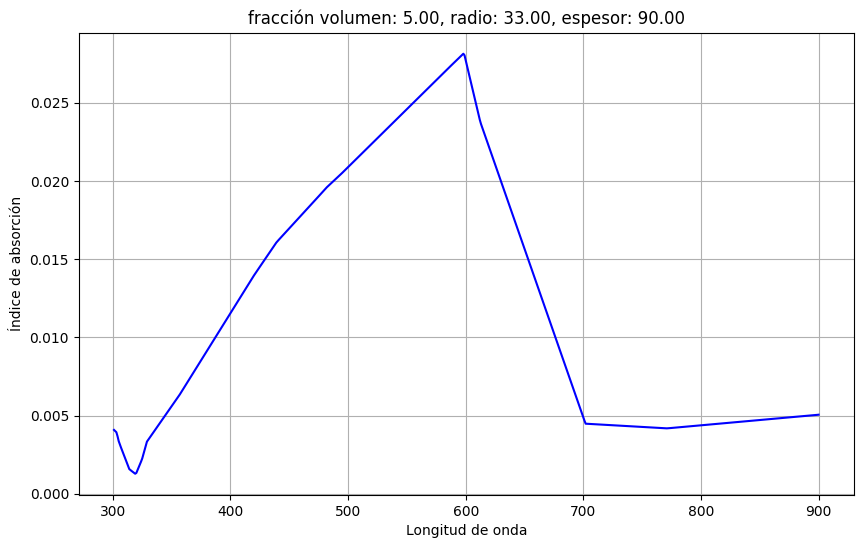

19/19 [==============================] - 0s 540us/step


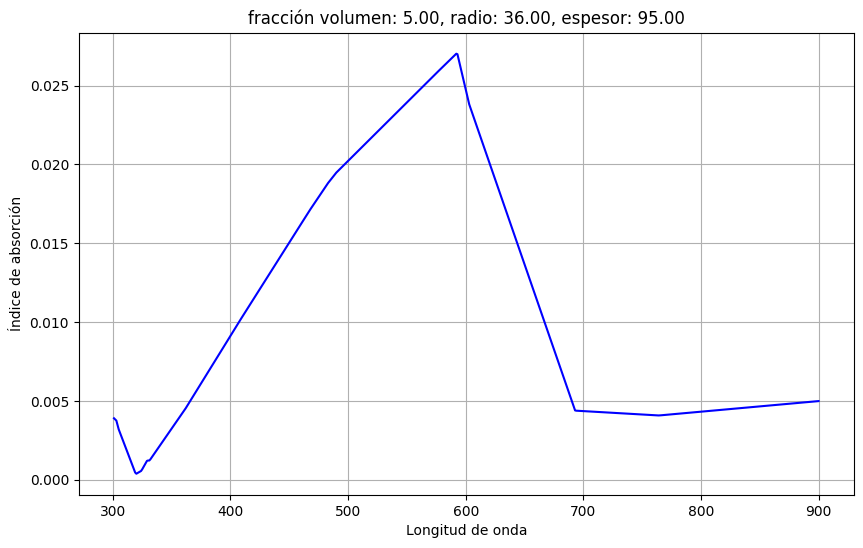

19/19 [==============================] - 0s 512us/step


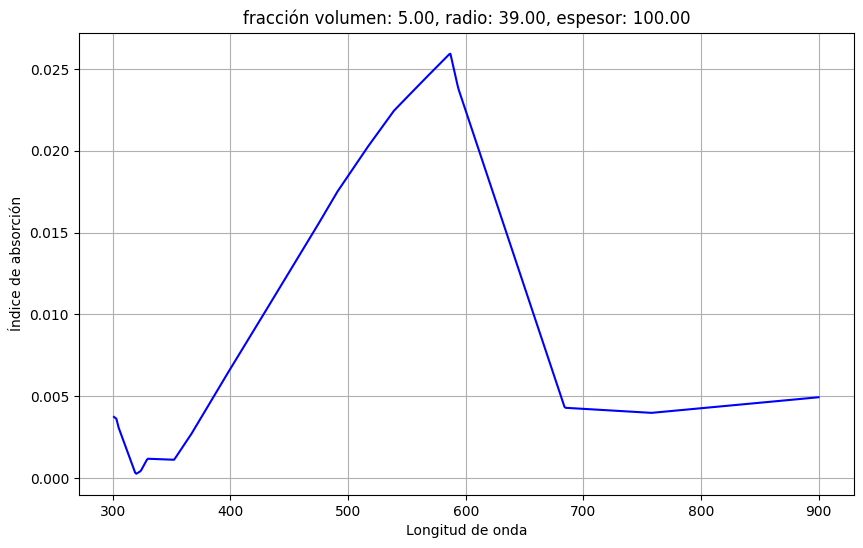

19/19 [==============================] - 0s 557us/step


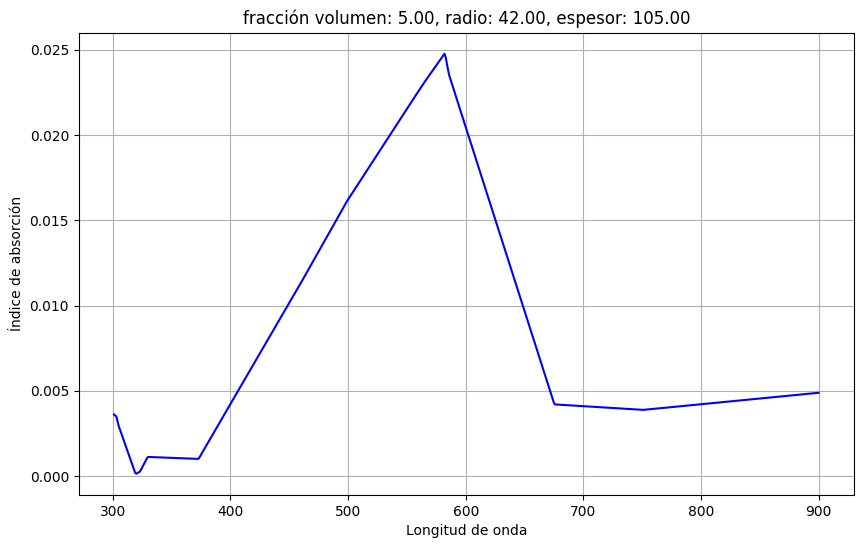

19/19 [==============================] - 0s 586us/step


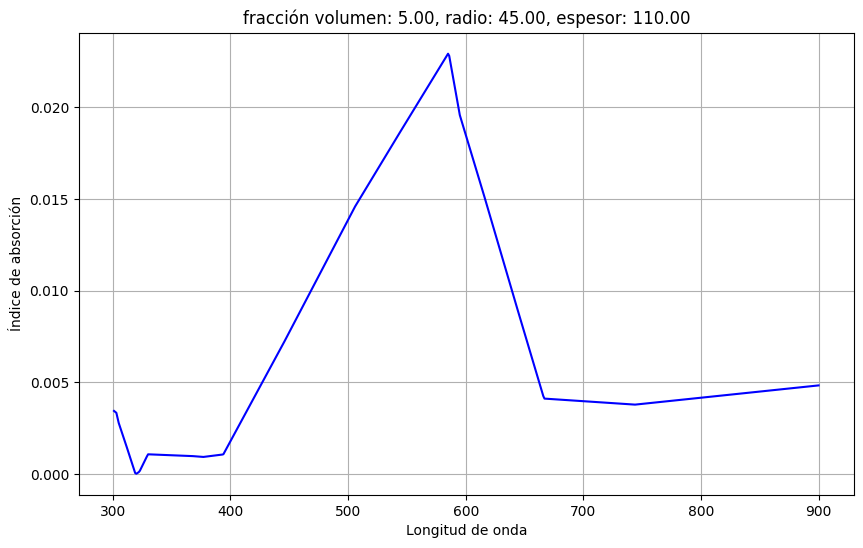

19/19 [==============================] - 0s 581us/step


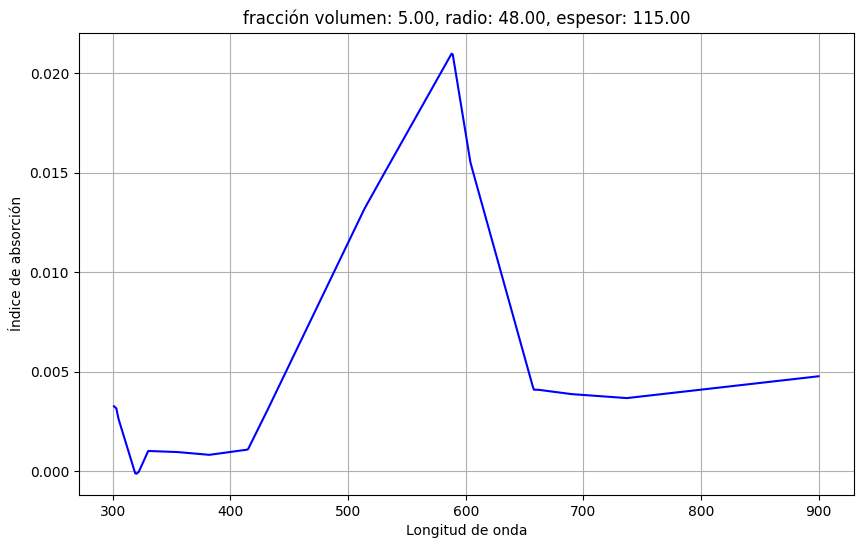

19/19 [==============================] - 0s 588us/step


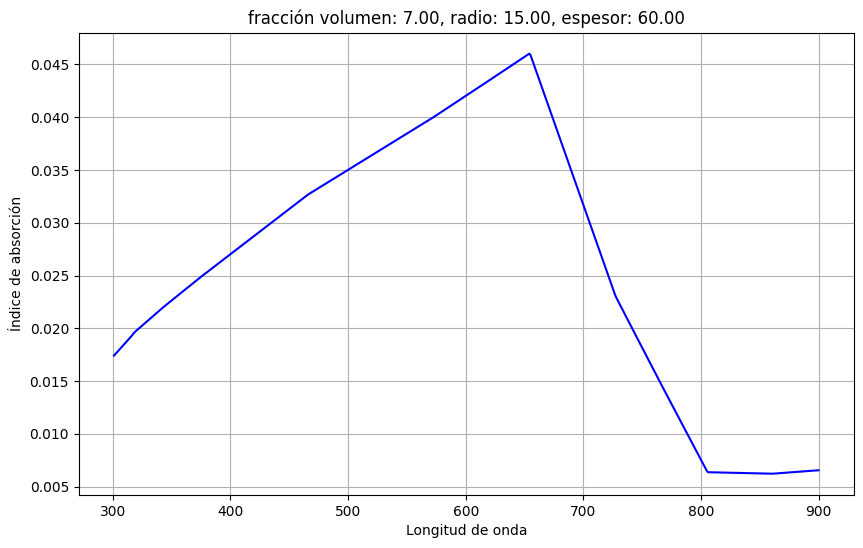

19/19 [==============================] - 0s 663us/step


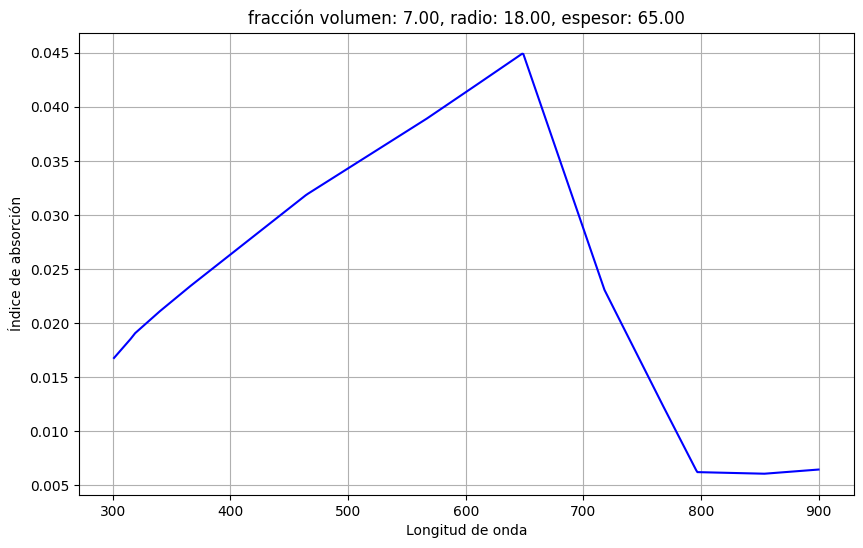

19/19 [==============================] - 0s 571us/step


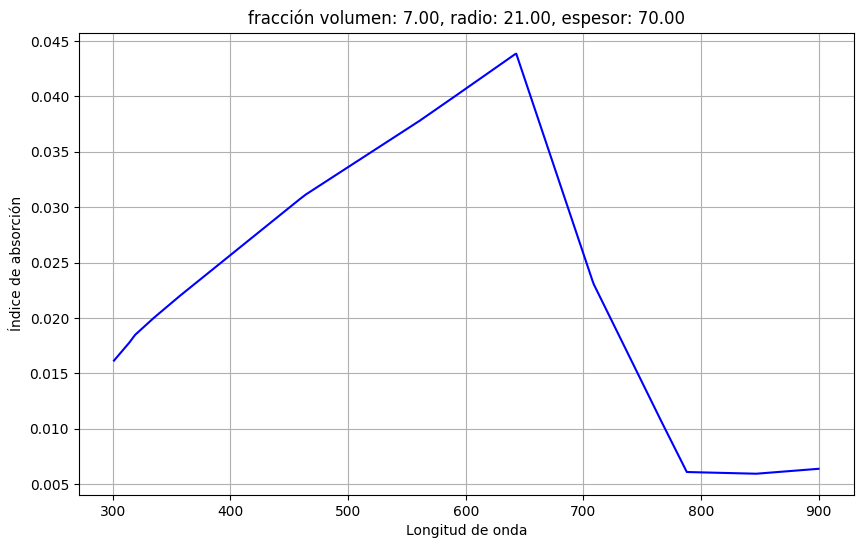

19/19 [==============================] - 0s 567us/step


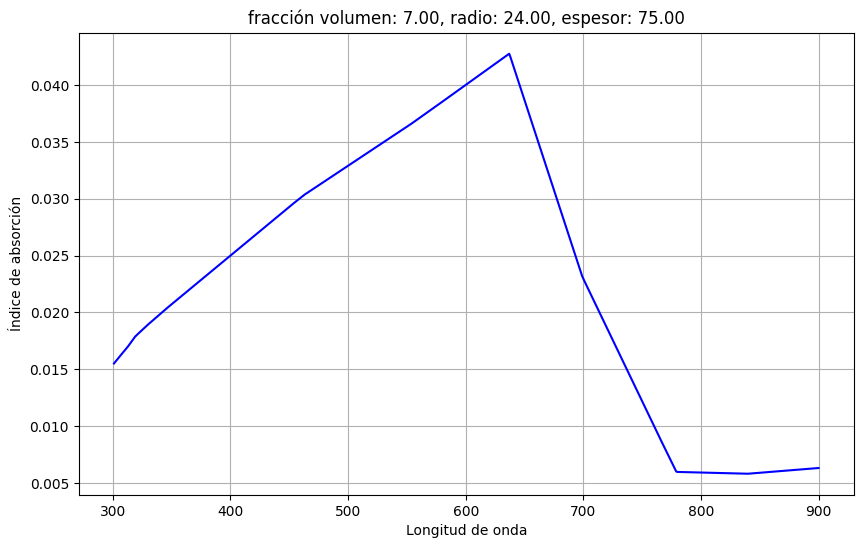

19/19 [==============================] - 0s 782us/step


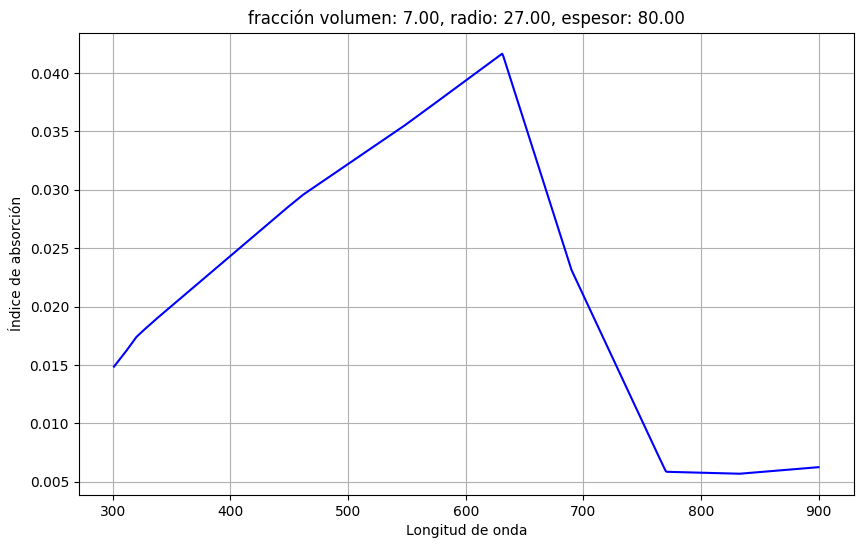

19/19 [==============================] - 0s 632us/step


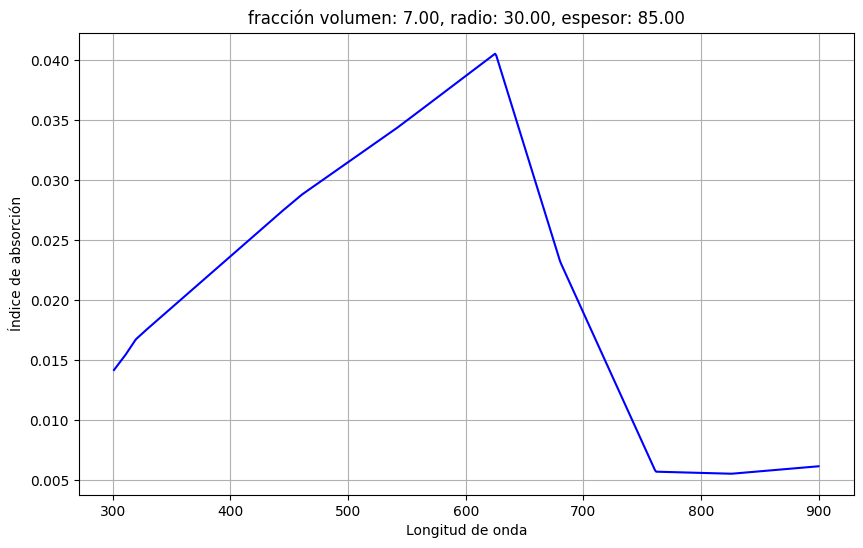

19/19 [==============================] - 0s 576us/step


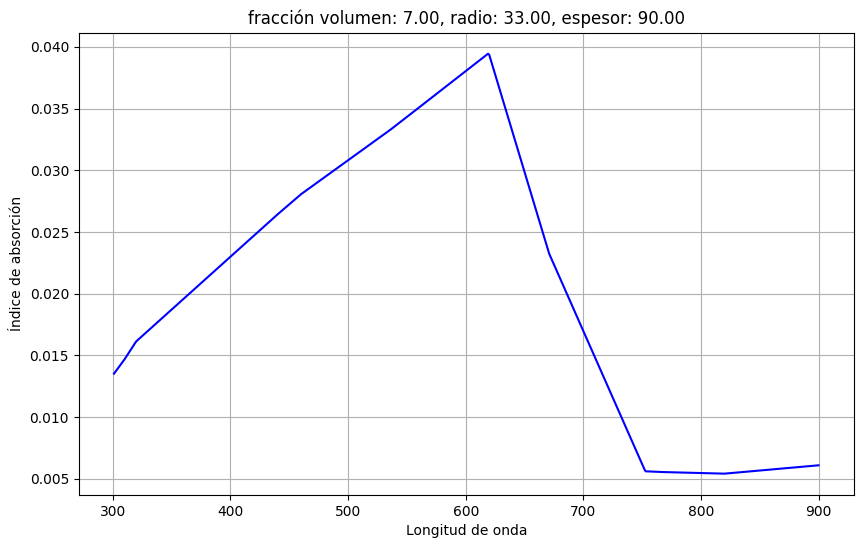

19/19 [==============================] - 0s 573us/step


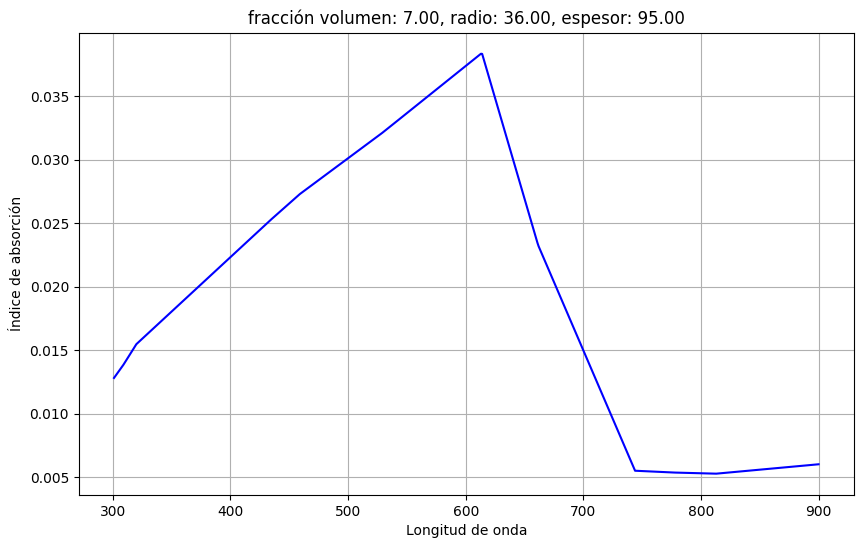

19/19 [==============================] - 0s 580us/step


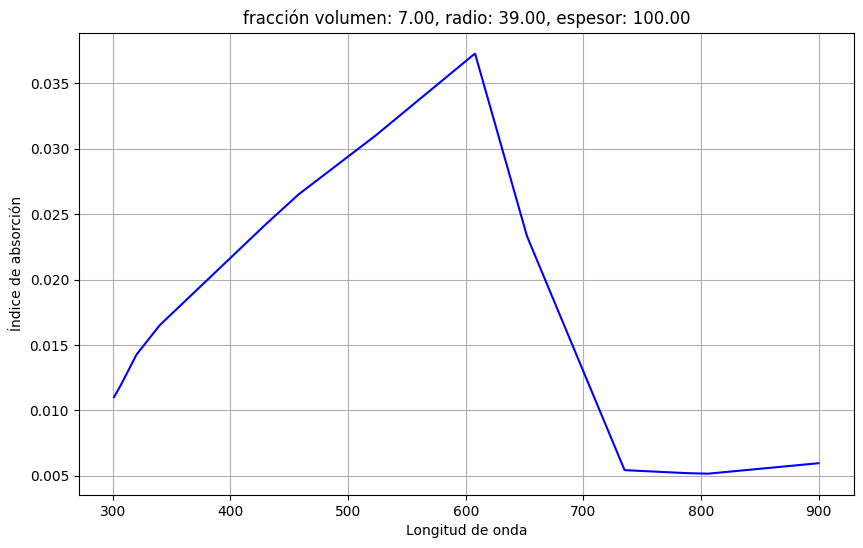

19/19 [==============================] - 0s 615us/step


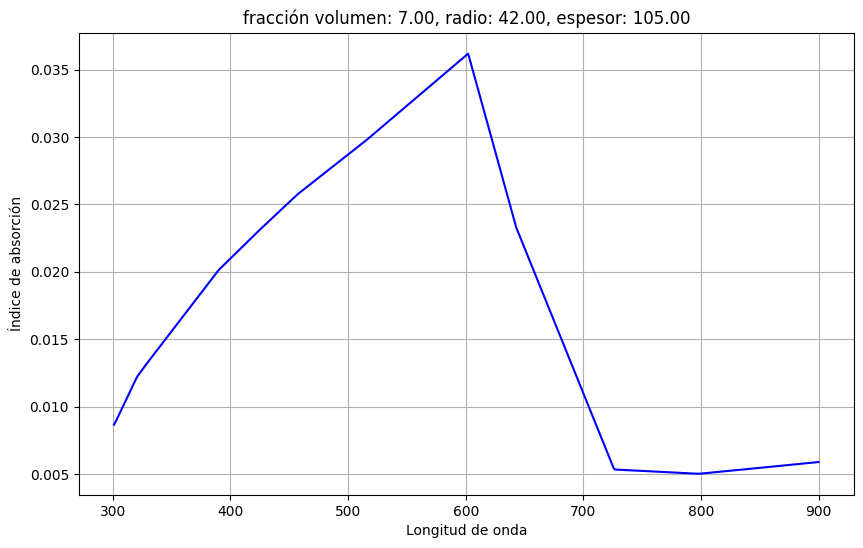

19/19 [==============================] - 0s 612us/step


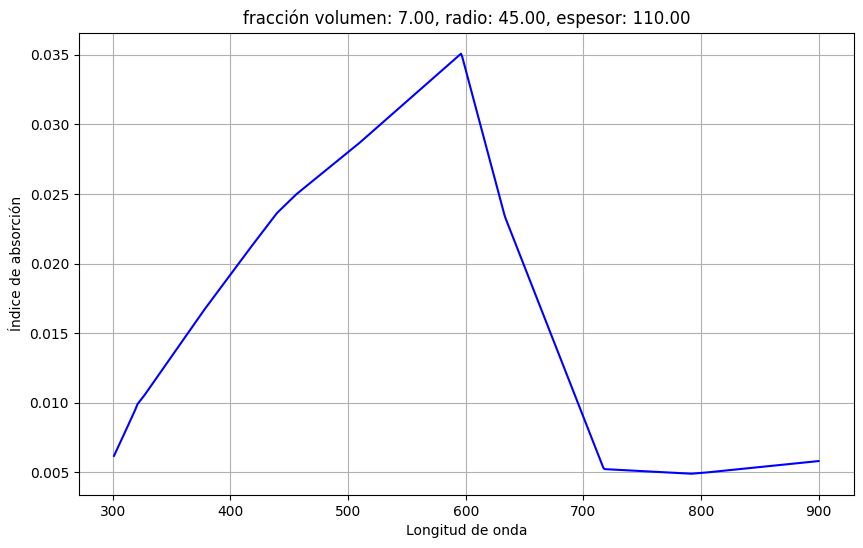

19/19 [==============================] - 0s 619us/step


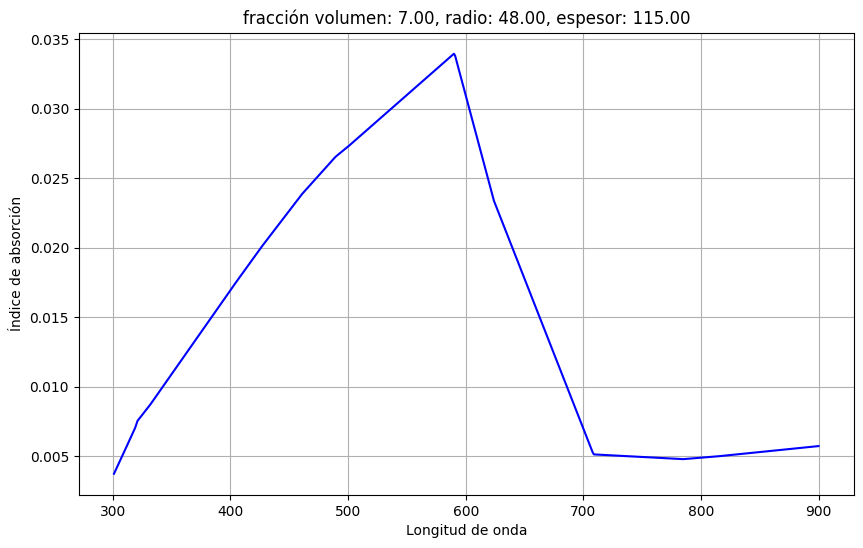

19/19 [==============================] - 0s 581us/step


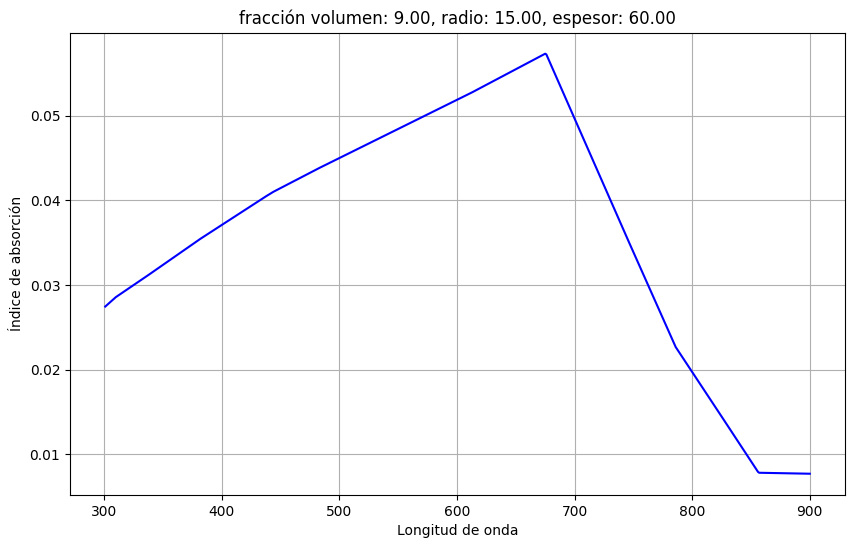

19/19 [==============================] - 0s 627us/step


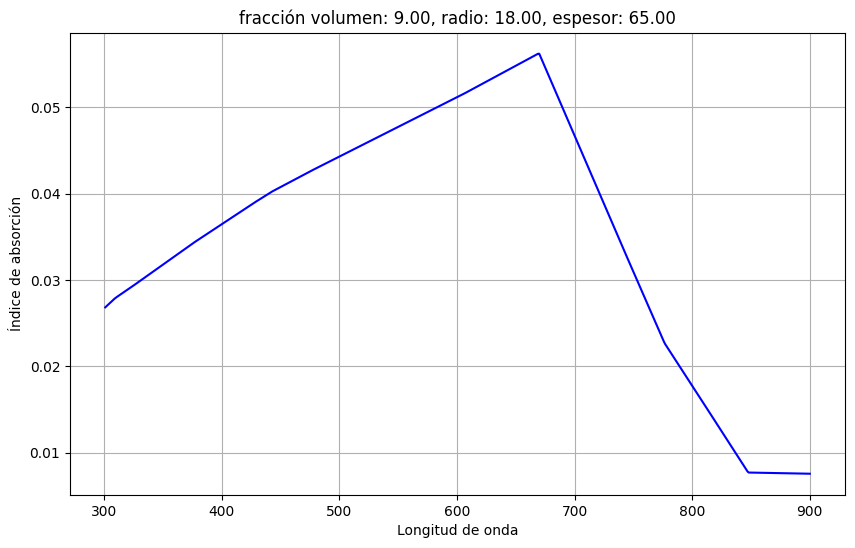

19/19 [==============================] - 0s 594us/step


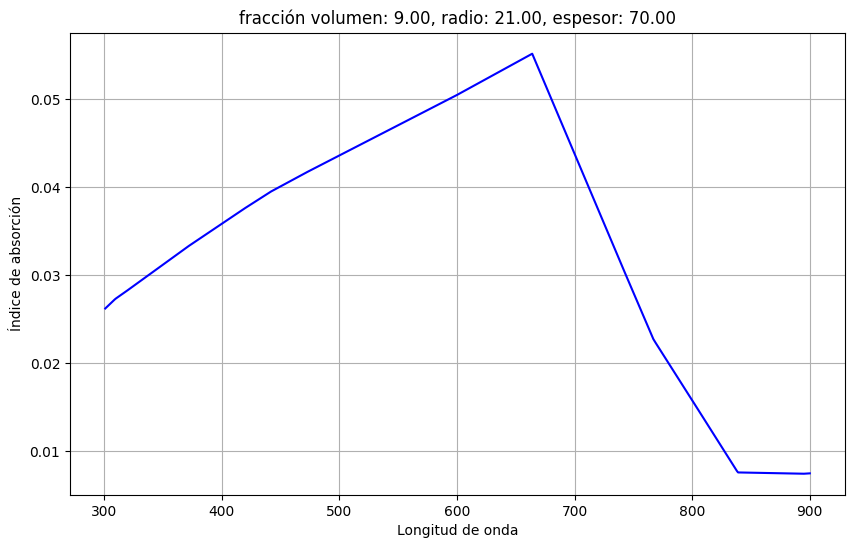

19/19 [==============================] - 0s 512us/step


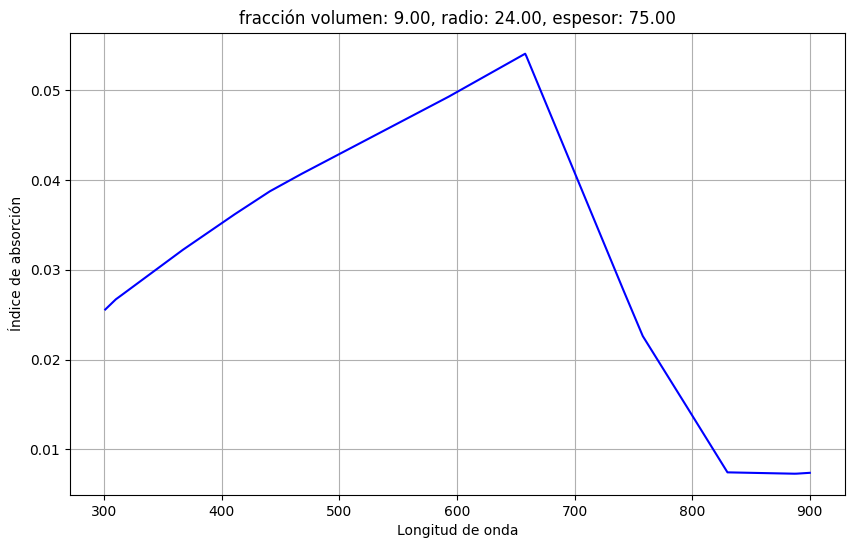

19/19 [==============================] - 0s 575us/step


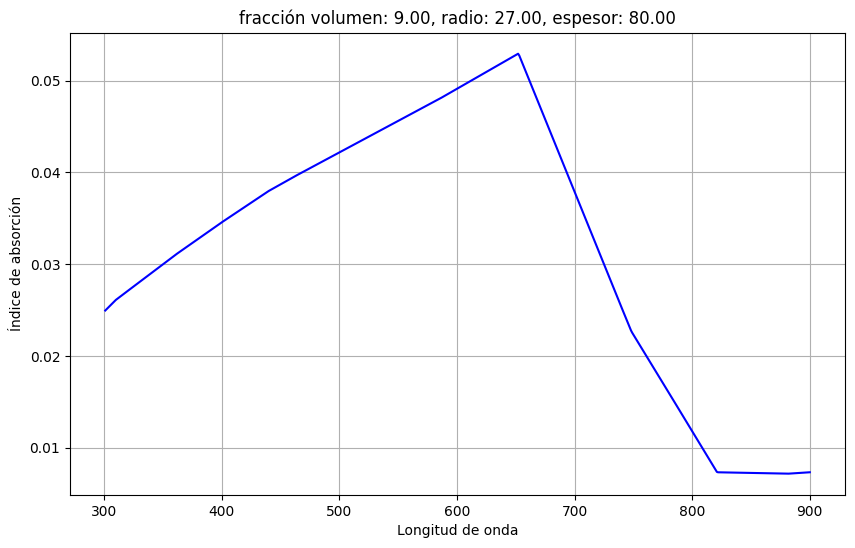

19/19 [==============================] - 0s 890us/step


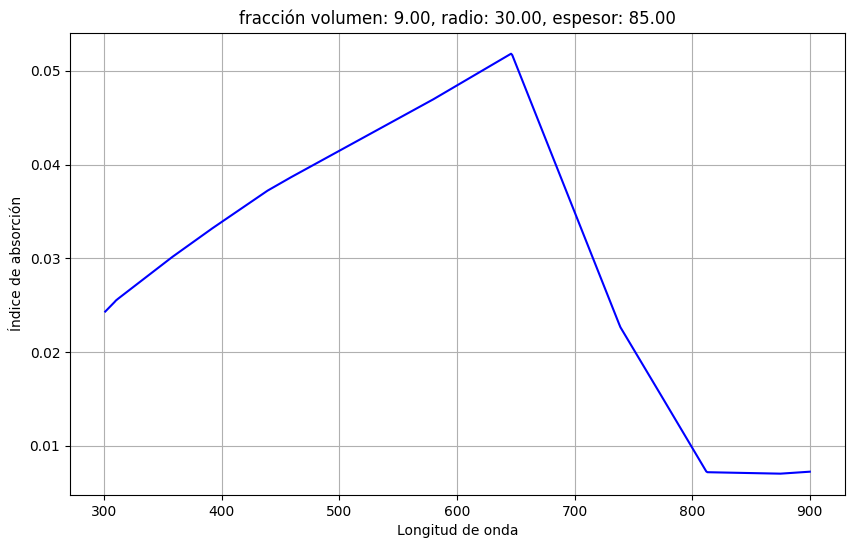

19/19 [==============================] - 0s 520us/step


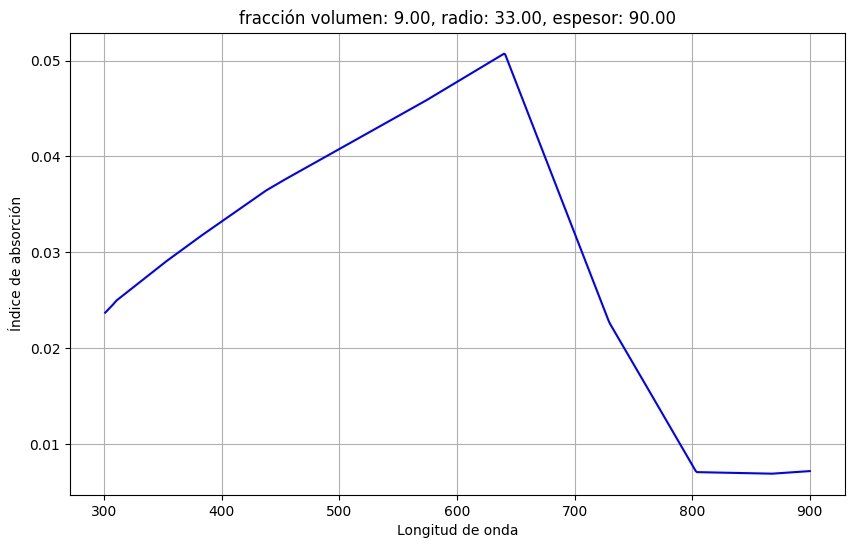

19/19 [==============================] - 0s 593us/step


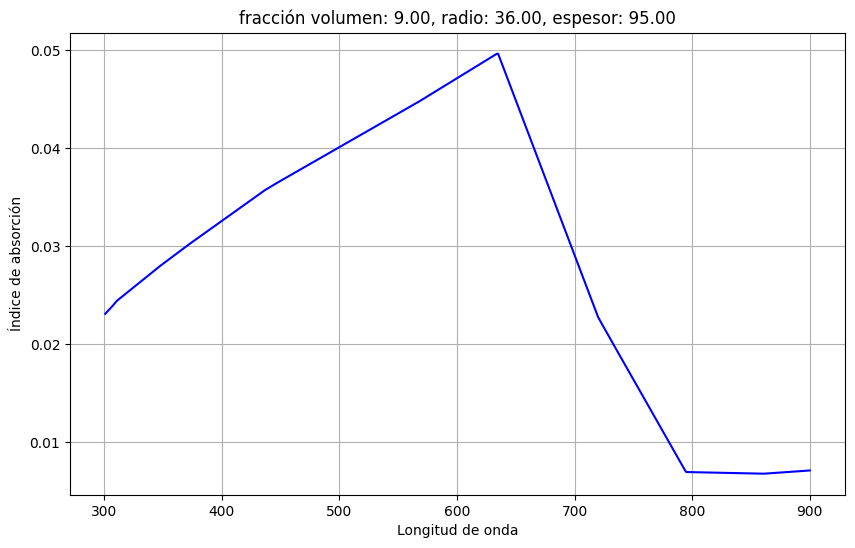

19/19 [==============================] - 0s 500us/step


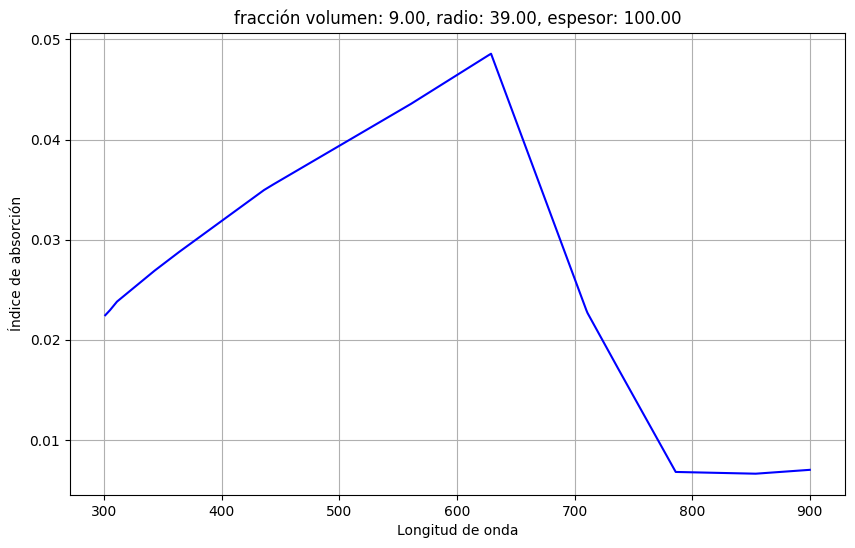

19/19 [==============================] - 0s 581us/step


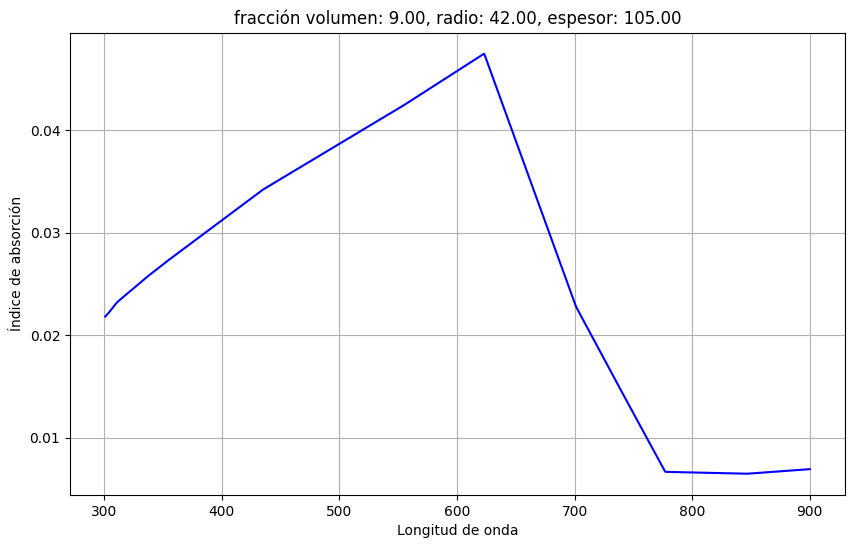

19/19 [==============================] - 0s 566us/step


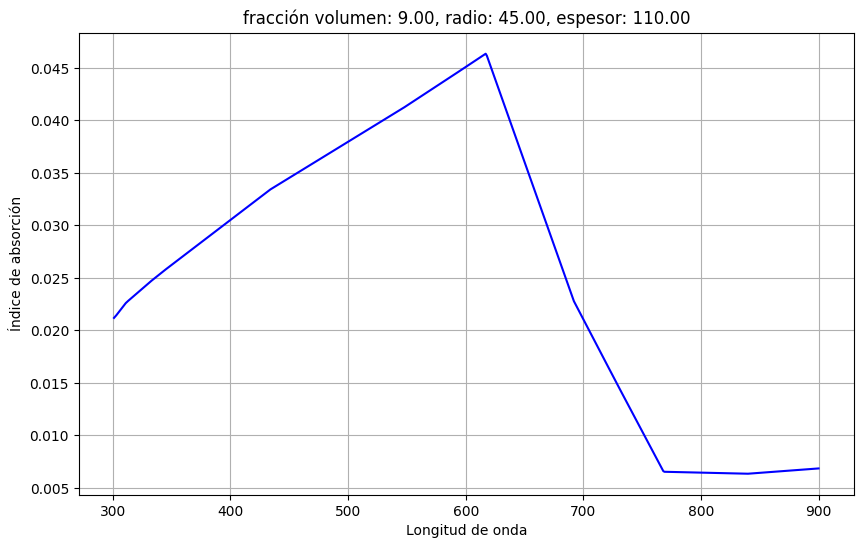

19/19 [==============================] - 0s 556us/step


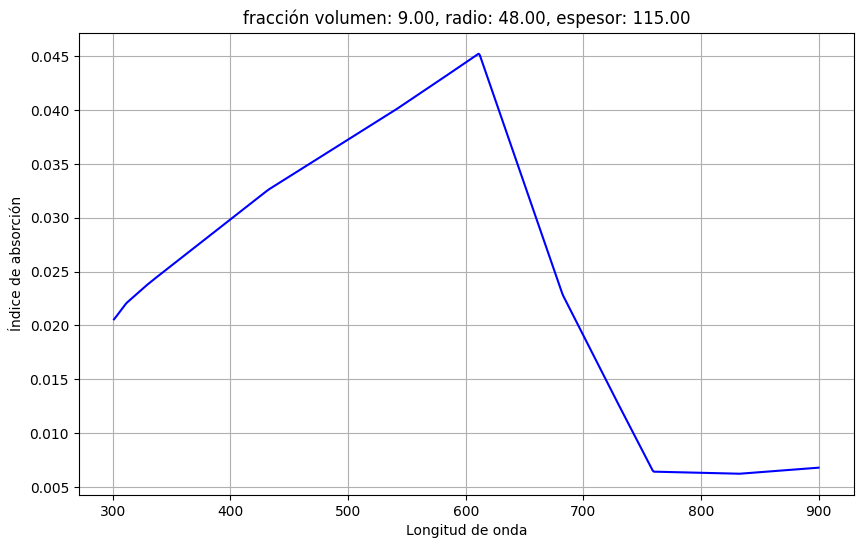

19/19 [==============================] - 0s 611us/step


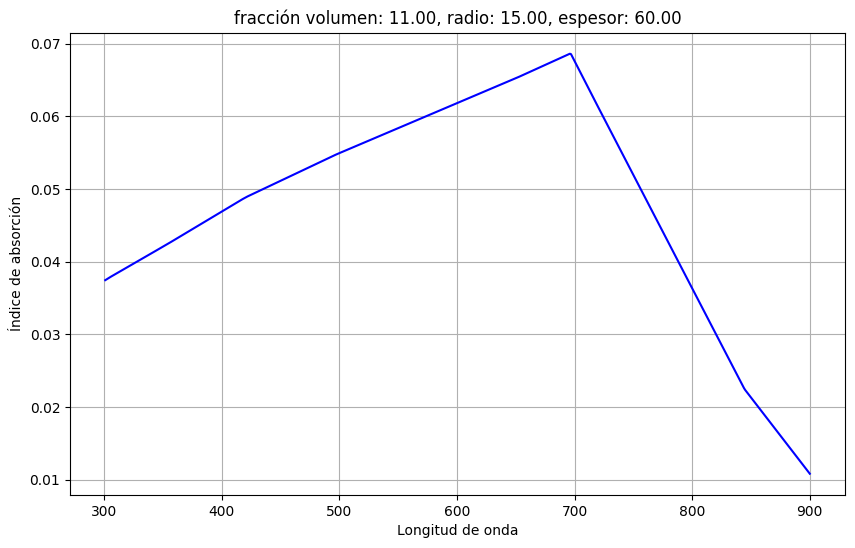

19/19 [==============================] - 0s 588us/step


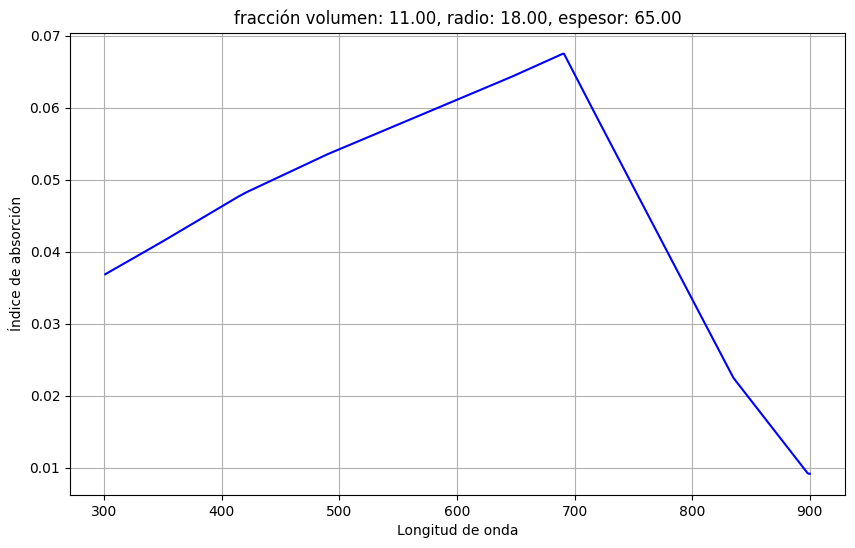

19/19 [==============================] - 0s 586us/step


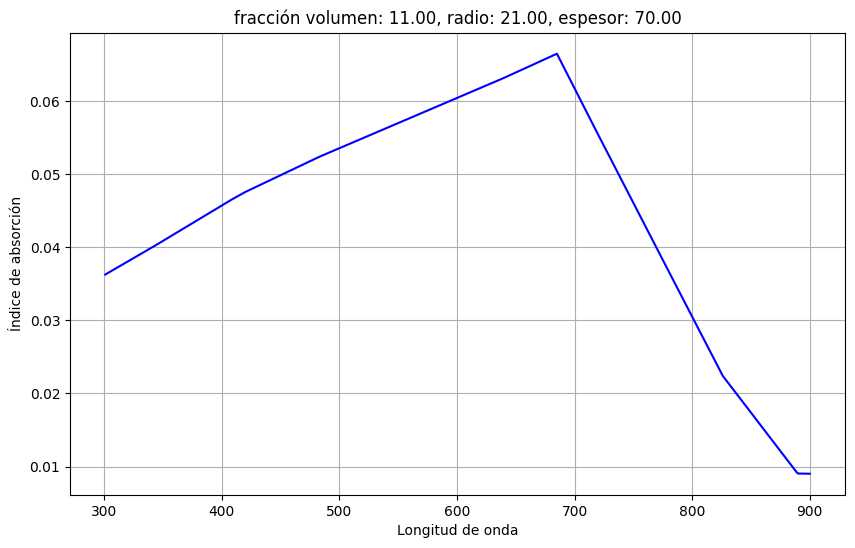

19/19 [==============================] - 0s 572us/step


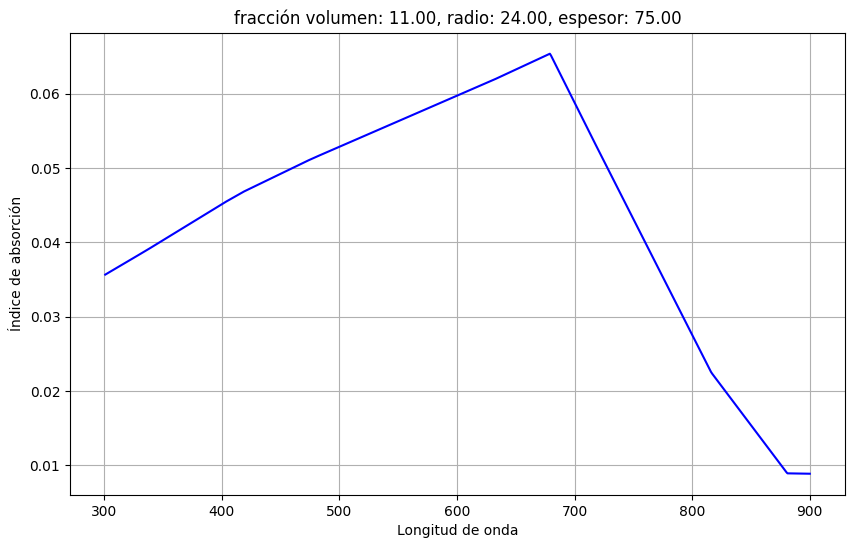

19/19 [==============================] - 0s 556us/step


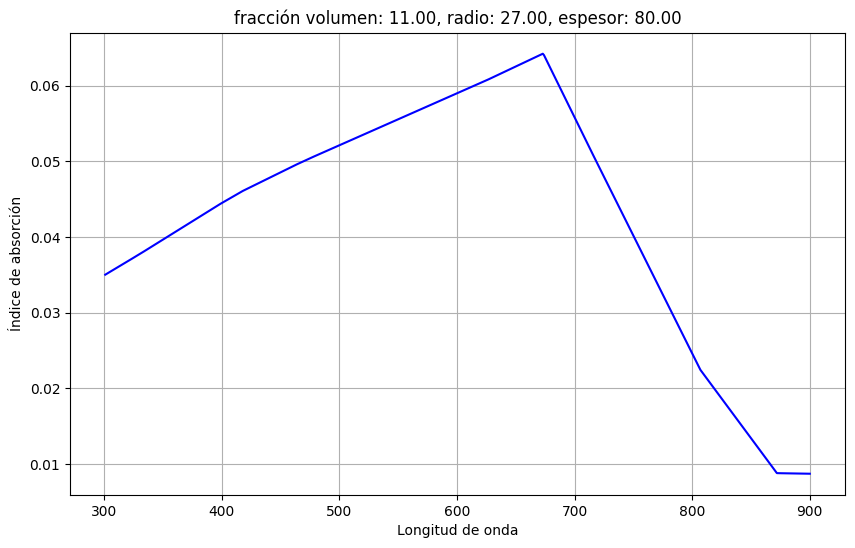

19/19 [==============================] - 0s 582us/step


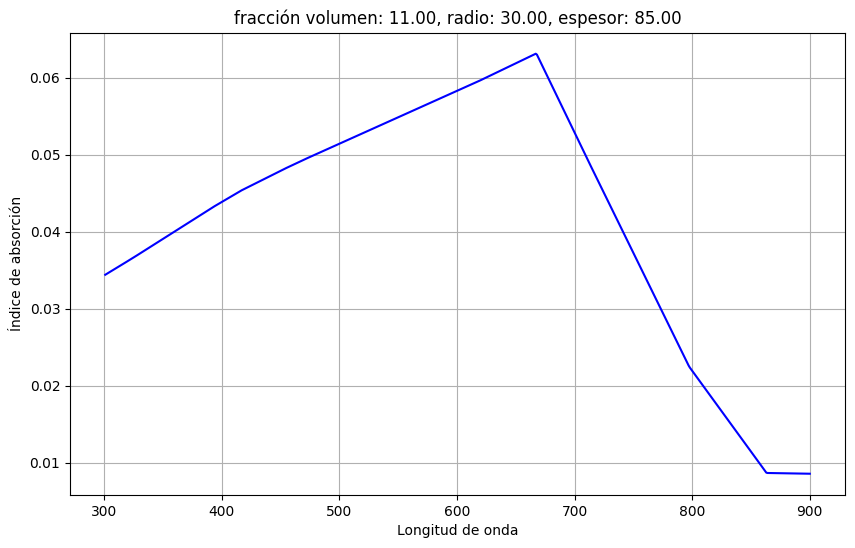

19/19 [==============================] - 0s 584us/step


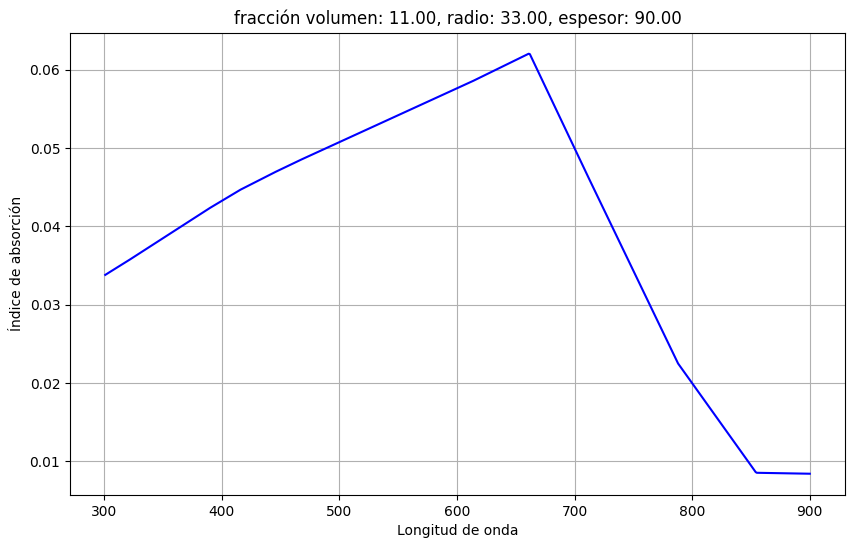

19/19 [==============================] - 0s 778us/step


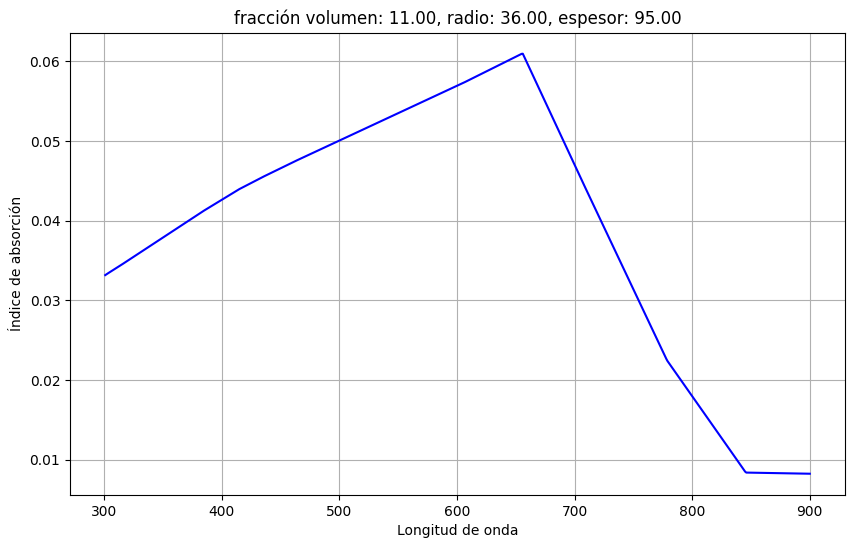

19/19 [==============================] - 0s 540us/step


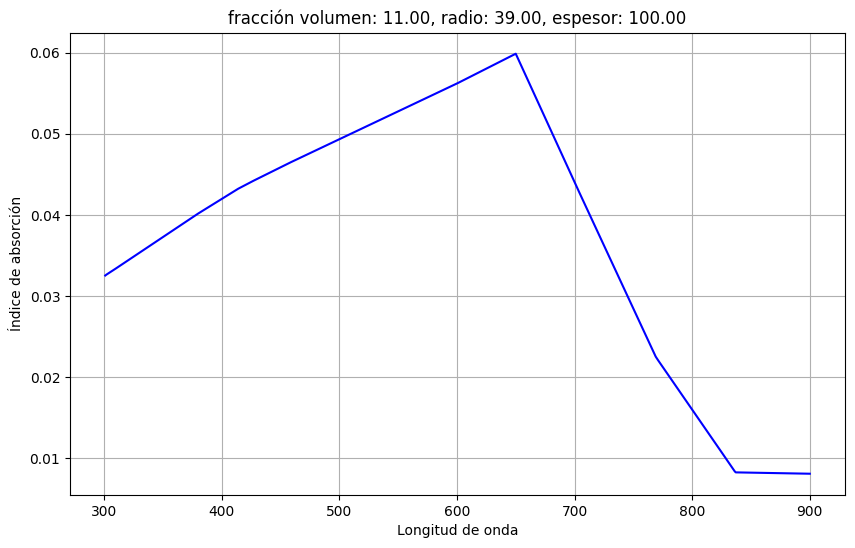

19/19 [==============================] - 0s 868us/step


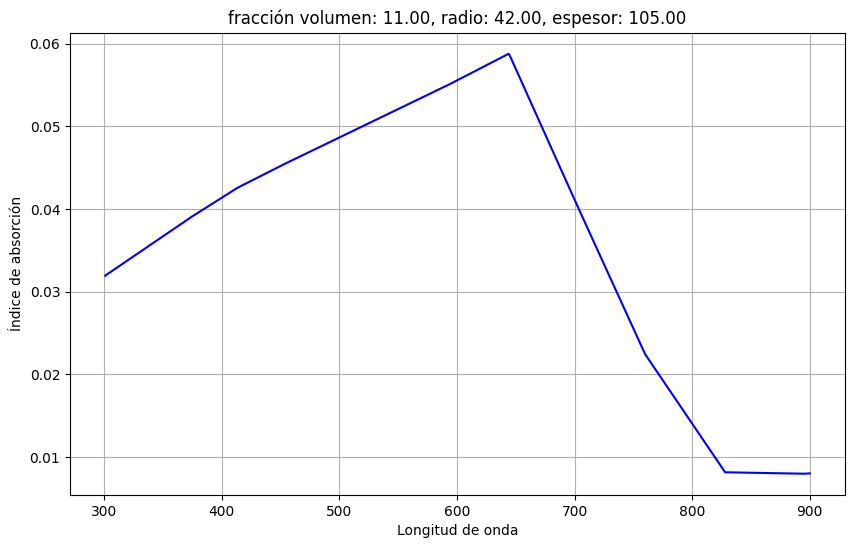

19/19 [==============================] - 0s 950us/step


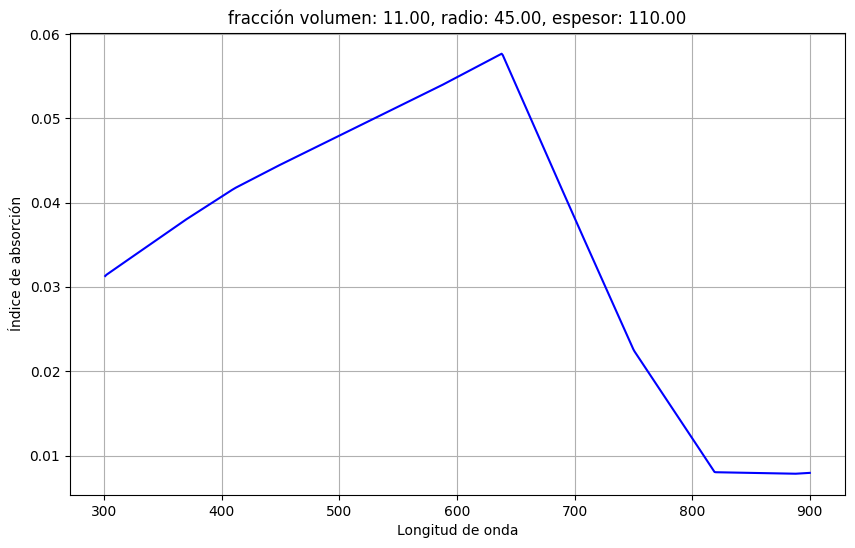

19/19 [==============================] - 0s 581us/step


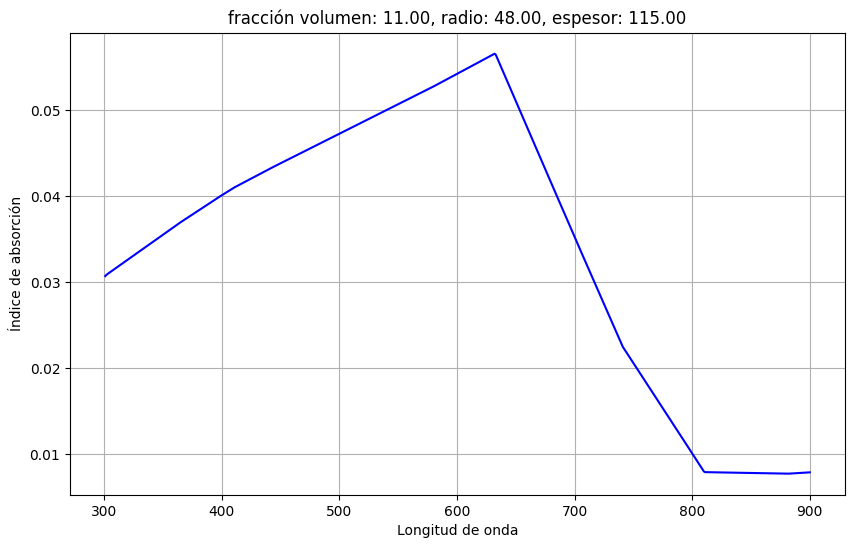

19/19 [==============================] - 0s 591us/step


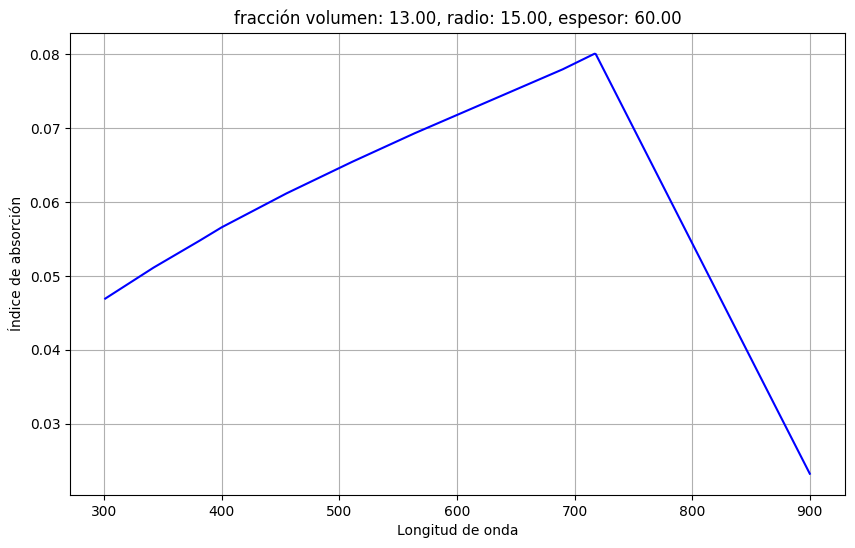

19/19 [==============================] - 0s 938us/step


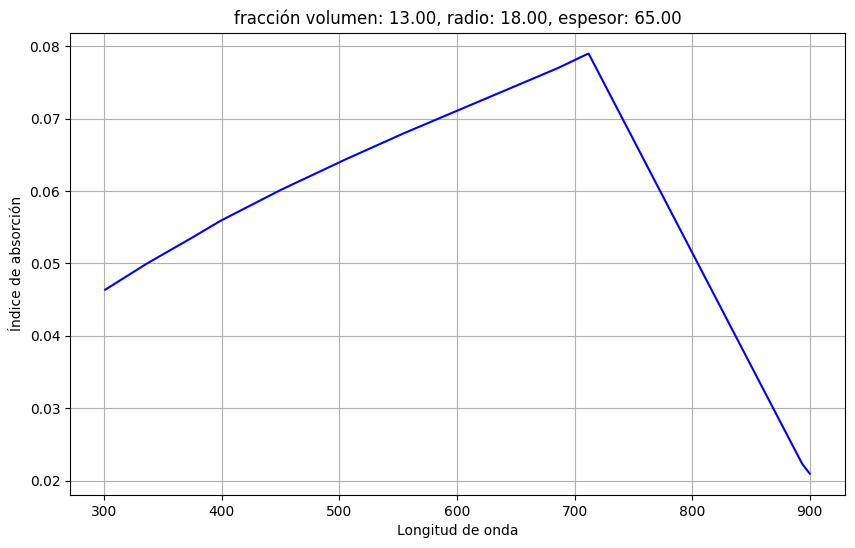

19/19 [==============================] - 0s 625us/step


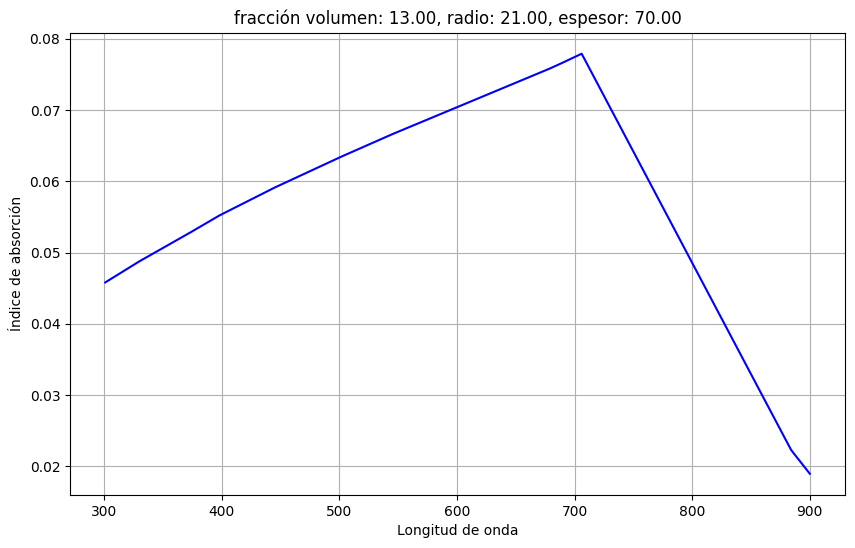

19/19 [==============================] - 0s 634us/step


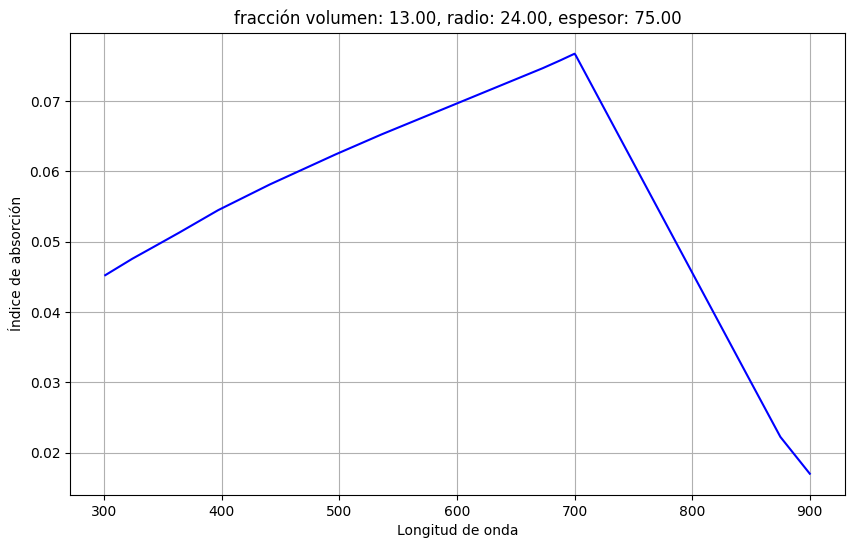

19/19 [==============================] - 0s 594us/step


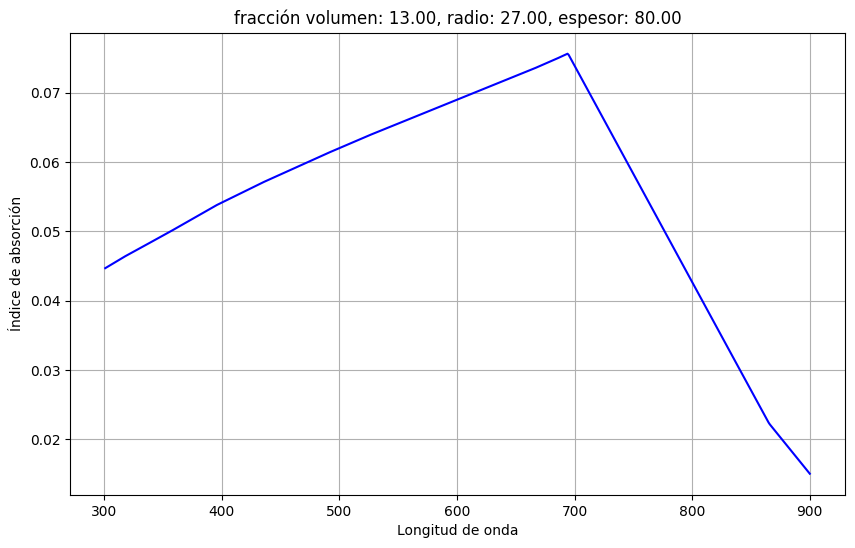

19/19 [==============================] - 0s 601us/step


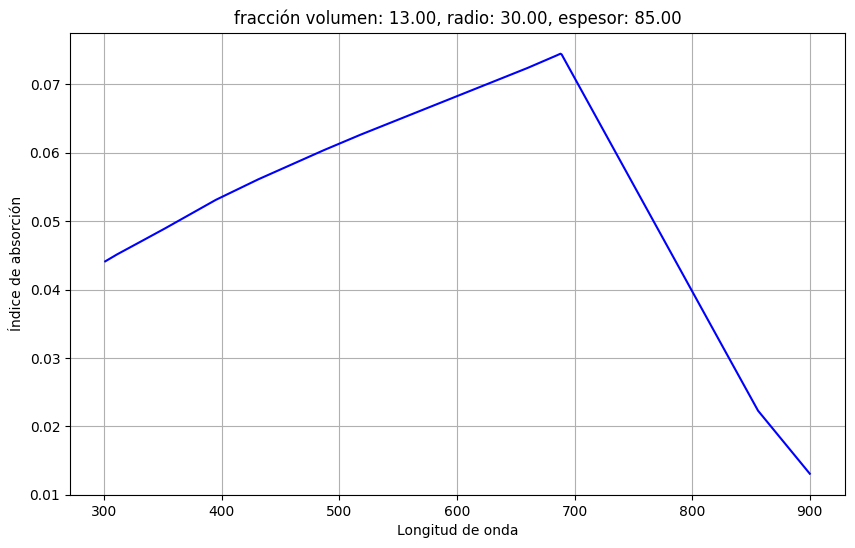

19/19 [==============================] - 0s 575us/step


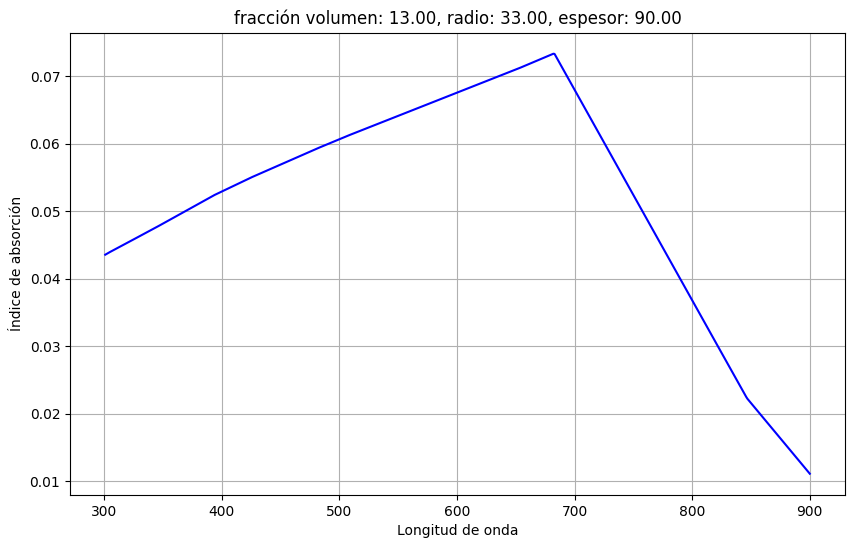

19/19 [==============================] - 0s 591us/step


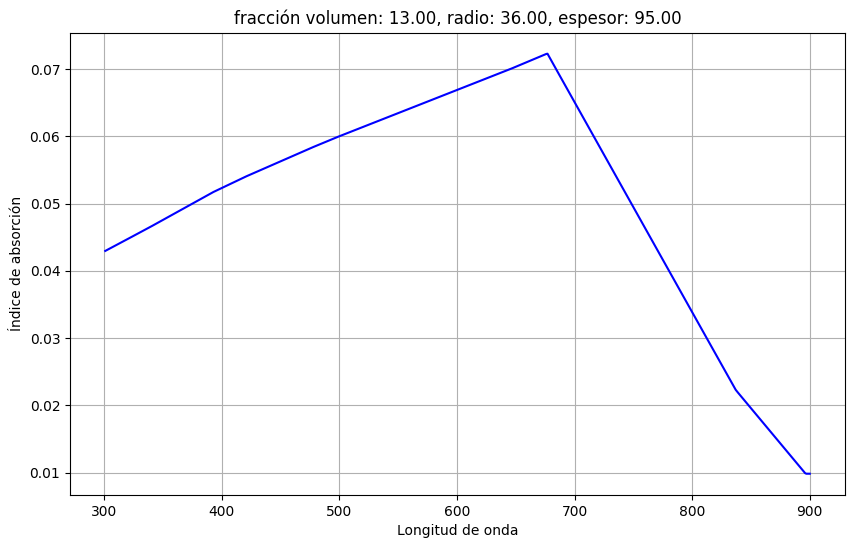

19/19 [==============================] - 0s 509us/step


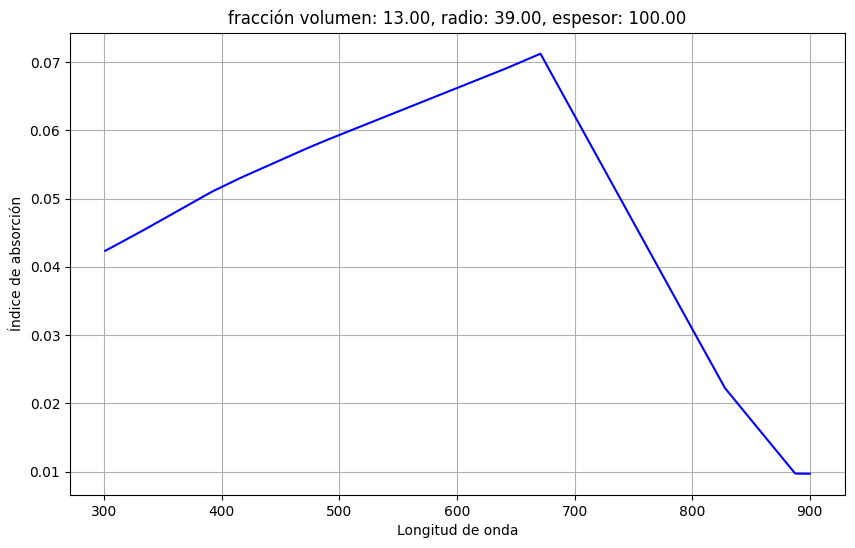

19/19 [==============================] - 0s 541us/step


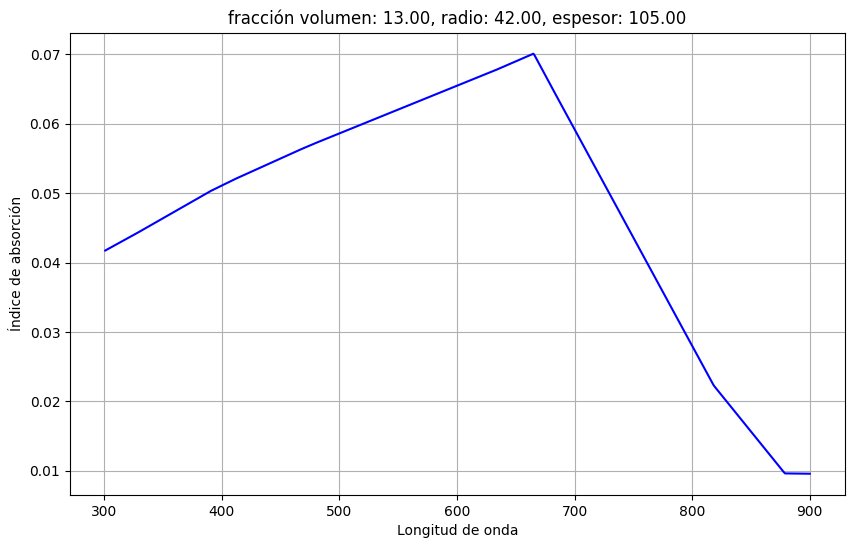

19/19 [==============================] - 0s 561us/step


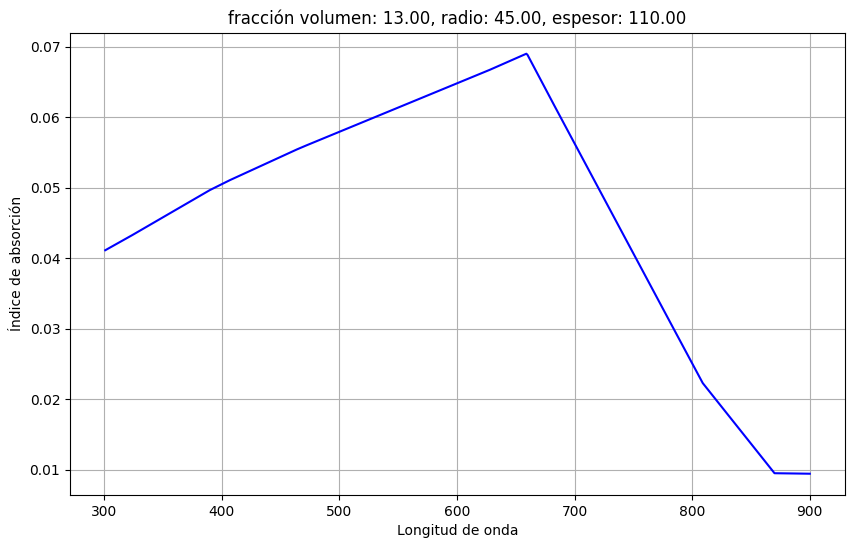

19/19 [==============================] - 0s 630us/step


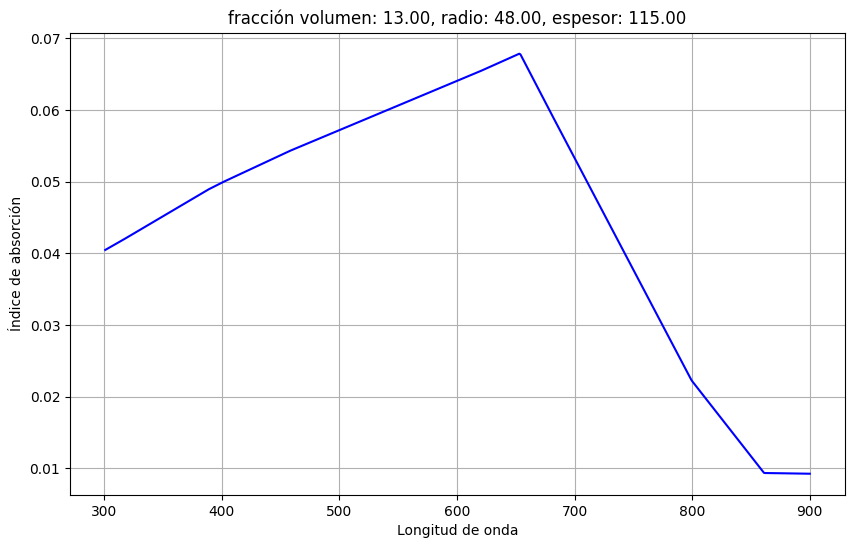

19/19 [==============================] - 0s 591us/step


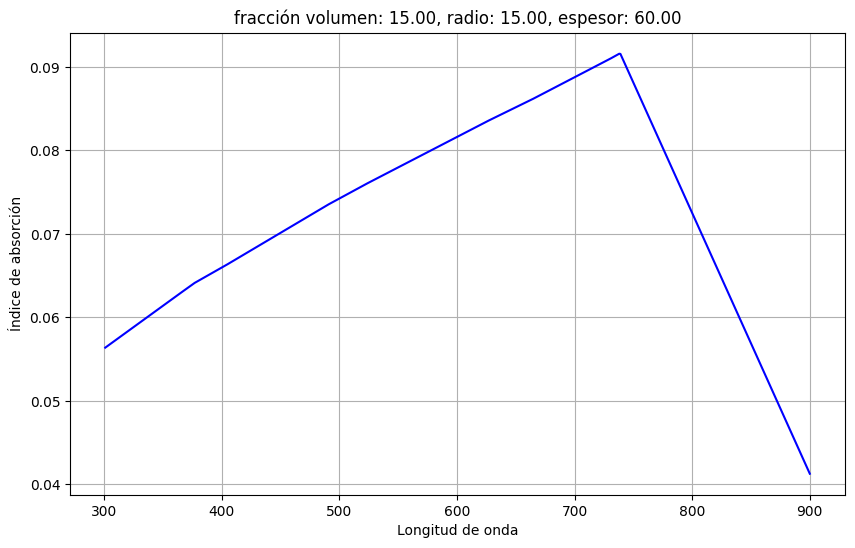

19/19 [==============================] - 0s 557us/step


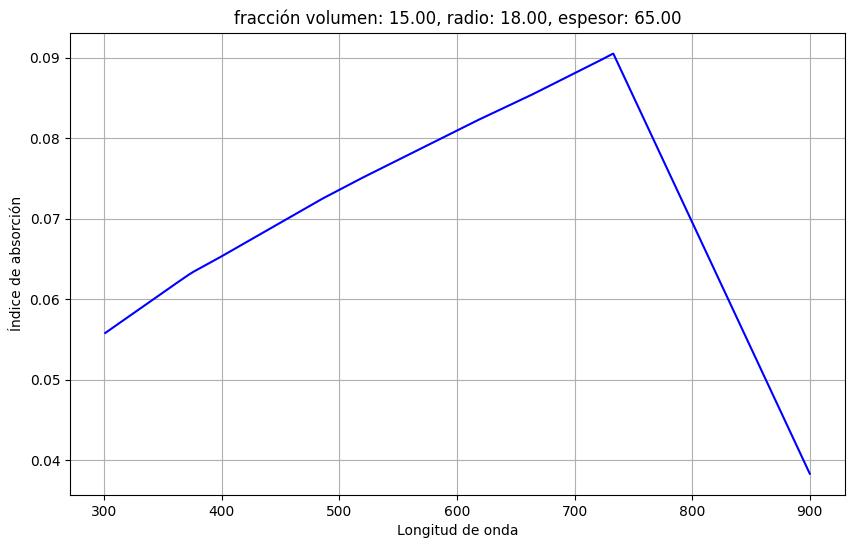

19/19 [==============================] - 0s 581us/step


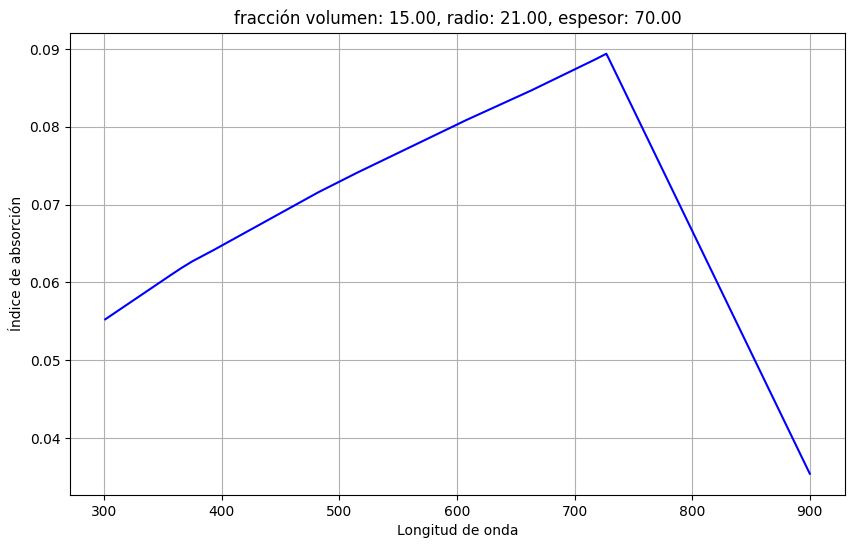

19/19 [==============================] - 0s 572us/step


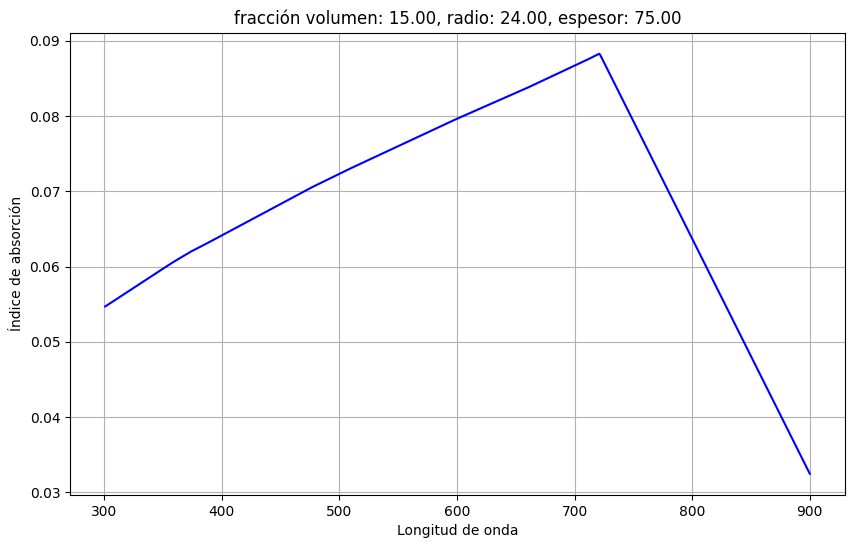

19/19 [==============================] - 0s 643us/step


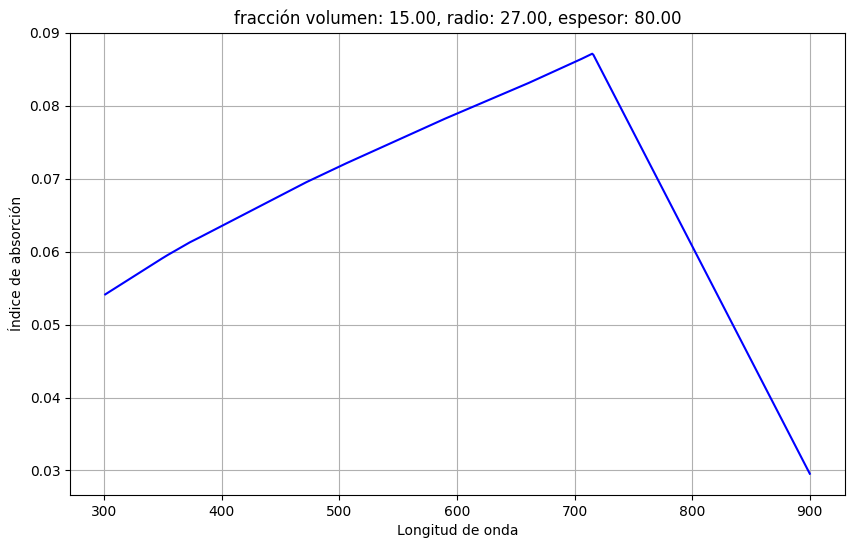

19/19 [==============================] - 0s 569us/step


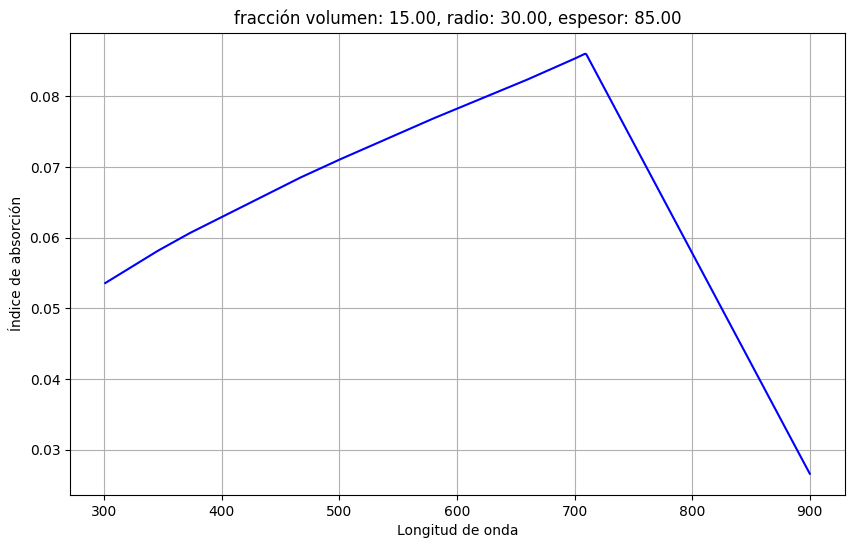

19/19 [==============================] - 0s 607us/step


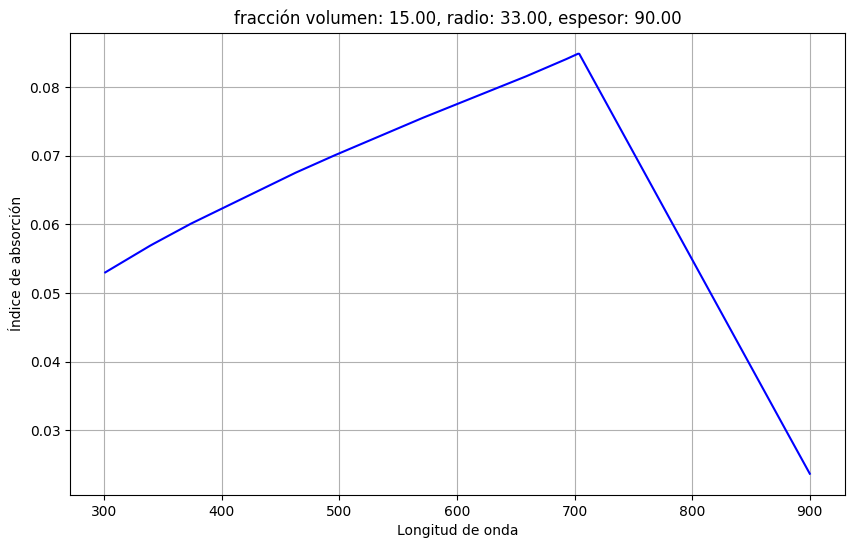

19/19 [==============================] - 0s 642us/step


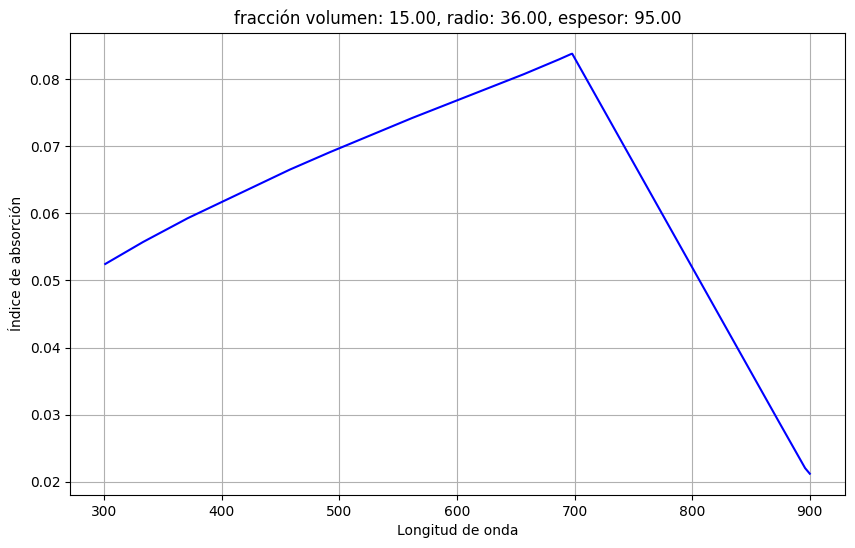

19/19 [==============================] - 0s 3ms/step


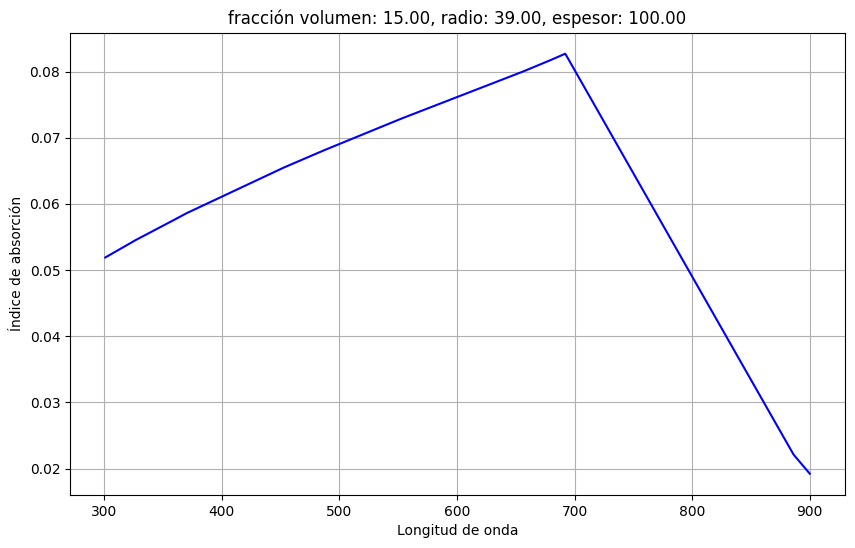

19/19 [==============================] - 0s 526us/step


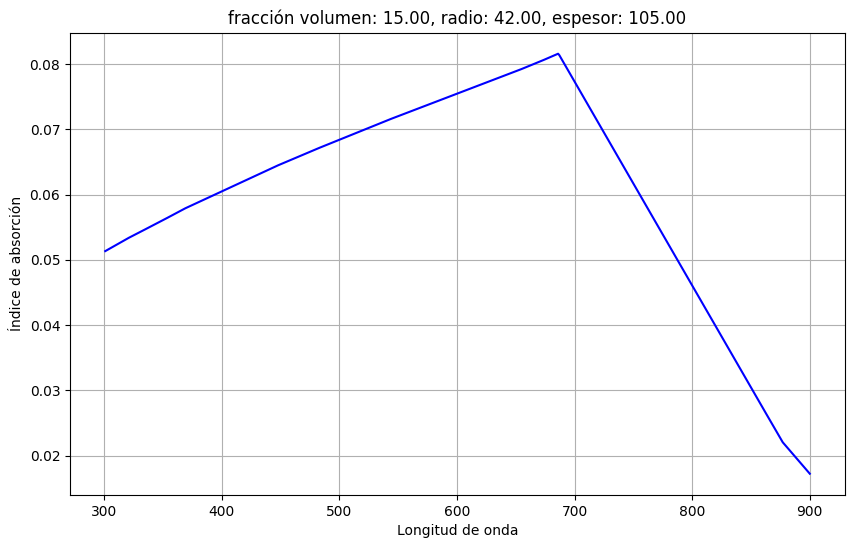

19/19 [==============================] - 0s 617us/step


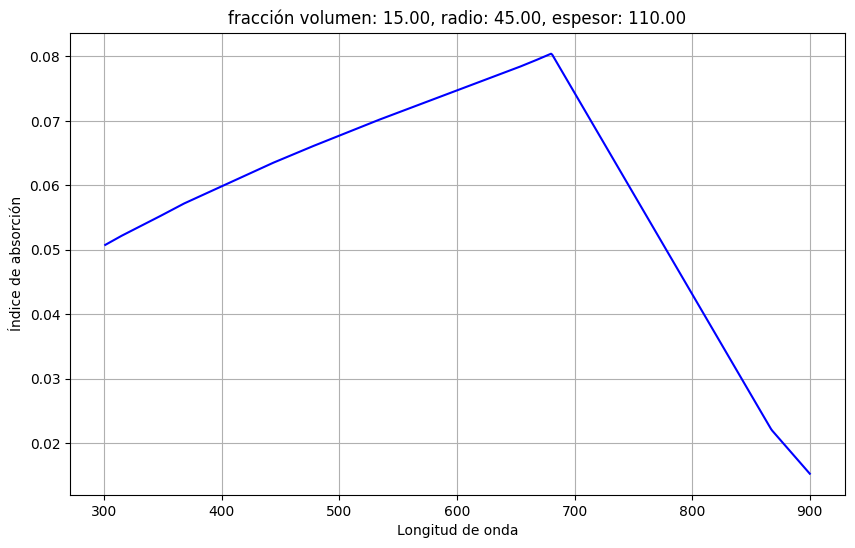

19/19 [==============================] - 0s 563us/step


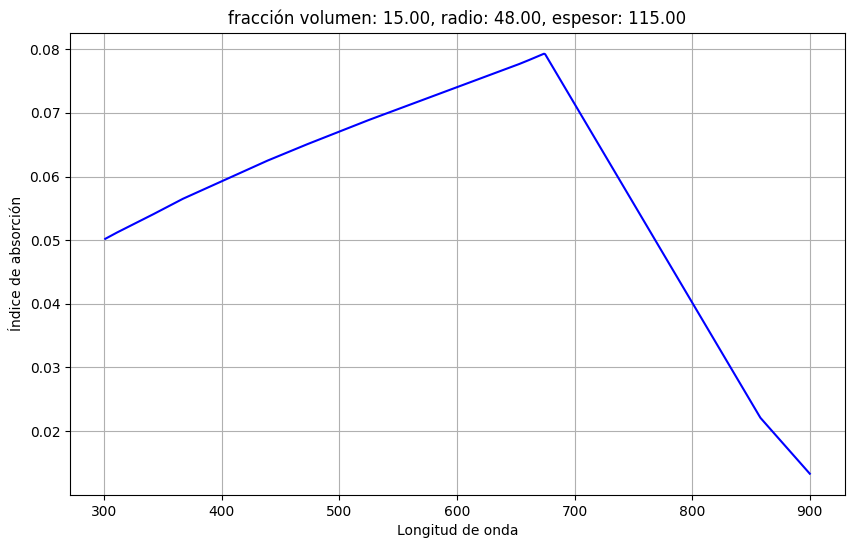

In [373]:
for i, num in enumerate(fracvol):
    for j in range(len(radio)):  # Iterar a través de todos los valores de radio y espesor
        data = {
            "Longitud de onda": longitud_de_onda,
            "Fracvol": [num] * len(longitud_de_onda),
            "Radio (nm)": [radio[j]] * len(longitud_de_onda),
            "Espesor de la película (nm)": [espesor[j]] * len(longitud_de_onda)
        }
        
        df = pd.DataFrame(data)
        scaler_X = joblib.load('minmax_scaler_X.pkl')
        x = df.values
        x_norm = scaler_X.transform(x)
        predictions = model.predict(x_norm)
        df1 = pd.DataFrame(df, columns=['Longitud de onda', 'Fracvol', 'Radio (nm)', 'Espesor de la película (nm)'])
        df2 = pd.DataFrame(predictions, columns=['Índice de absorción'])
        result_df = pd.concat([df1, df2], axis=1)
        columnas_seleccionadas = ['Longitud de onda', 'Índice de absorción']
        df_seleccionado = result_df[columnas_seleccionadas]
        titulo = 'fracción volumen: {:.2f}, radio: {:.2f}, espesor: {:.2f}'.format(num, radio[j], espesor[j])
        
        # Crear la gráfica de dispersión
        plt.figure(figsize=(10, 6))
        plt.plot(df_seleccionado['Longitud de onda'], df_seleccionado['Índice de absorción'], color='blue')
        plt.xlabel('Longitud de onda')
        plt.ylabel('Índice de absorción')
        plt.title(titulo)
        plt.grid(True)
        plt.show()
